# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings
warnings.filterwarnings(action="ignore")


In [2]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Setting path for trip records
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/EDAassignment/Datasets and Dictionary/trip_records")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

df= pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [7]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')



In [9]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
# import os

# Select the folder having data files
# os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        if not file_name.endswith(".parquet") or not file_name.startswith("2023"): continue
        # Reading the current file
        data= pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        unique_dates = data.tpep_pickup_datetime.dt.date.unique()

        # Loop through dates and then loop through every hour of each date
        for date in unique_dates:
          day_data = data[data.tpep_pickup_datetime.dt.date == date]
          # Iterate through each hour of the selected date
          for hour in range(24):
            hour_data = day_data[day_data.tpep_pickup_datetime.dt.hour == hour]
            # Sample 5% of the hourly data randomly
            sample = hour_data.sample(frac = 0.05, random_state = 42)
            # add data of this hour to the dataframe
            sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        print("{} completed".format(file_name))
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

2023-1.parquet completed
2023-2.parquet completed
2023-3.parquet completed
2023-4.parquet completed
2023-5.parquet completed
2023-6.parquet completed
2023-7.parquet completed
2023-8.parquet completed
2023-9.parquet completed
2023-10.parquet completed
2023-11.parquet completed
2023-12.parquet completed


In [10]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
428             2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1113            2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
819             2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3192            2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
428               7.74         1.0                  N           138   
1113              1.24         1.0                  N           161   
819               1.44         1.0                  N           237   
3192              0.54         1.0                  N           143   
2995263          19.24         NaN               None            66   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
428               256             2        32.40    6.0      0.5        0.00   
1113              237             1         7.90    1.0      0.5        2.58   
819               141             2        11.40    1.0      0.5        0.00   
3192              142             2         6.50    1.0      0.5        0.00   
2995263           107             0        25.64    0.0      0.5        5.93   

         tolls_amount  improvement_surcharge  total_amount  \
428               0.0                    1.0         41.15   
1113              0.0                    1.0         15.48   
819               0.0                    1.0         16.40   
3192              0.0                    1.0         11.50   
2995263           0.0                    1.0         35.57   

         congestion_surcharge  airport_fee  Airport_fee  
428                       0.0         1.25          NaN  
1113                      2.5         0.00          NaN  
819                       2.5         0.00          NaN  
3192                      2.5         0.00          NaN  
2995263                   NaN          NaN          NaN

In [11]:
df.tail()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3196251         2  2023-12-31 23:44:09   2023-12-31 23:50:04              1.0   
3194866         2  2023-12-31 23:44:04   2024-01-01 00:03:36              1.0   
3195561         2  2023-12-31 23:37:20   2023-12-31 23:41:18              1.0   
3376497         1  2023-12-31 23:12:30   2023-12-31 23:21:12              NaN   
3196303         2  2023-12-31 23:35:11   2024-01-01 00:15:03              5.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3196251           0.81         1.0                  N           263   
3194866           5.78         1.0                  N           161   
3195561           1.06         1.0                  N            79   
3376497           0.00         NaN               None           166   
3196303           8.45         1.0                  N           142   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
3196251           262             1         7.20    1.0      0.5        2.44   
3194866           261             1        27.50    1.0      0.5        4.00   
3195561           137             1         7.20    1.0      0.5        2.44   
3376497           244             0        14.64    0.0      0.5        0.00   
3196303           261             2        40.80    1.0      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
3196251           0.0                    1.0         14.64   
3194866           0.0                    1.0         36.50   
3195561           0.0                    1.0         14.64   
3376497           0.0                    1.0         16.14   
3196303           0.0                    1.0         45.80   

         congestion_surcharge  airport_fee  Airport_fee  
3196251                   2.5          NaN          0.0  
3194866                   2.5          NaN          0.0  
3195561                   2.5          NaN          0.0  
3376497                   NaN          NaN          NaN  
3196303                   2.5          NaN          0.0

In [12]:
df.sort_values(by='tpep_pickup_datetime', inplace= True)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 80 to 3195498
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            flo

In [14]:
# Store the df in csv/parquet
# df.to_parquet('')

df.to_parquet('nyc_prepared_data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [15]:
# Load the new data file
df = pd.read_parquet('/content/drive/MyDrive/EDAassignment/Datasets and Dictionary/trip_records/nyc_prepared_data.parquet')

In [16]:
# df.head()

df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
80           2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
4508         2  2023-01-01 00:00:57   2023-01-01 00:15:11              1.0   
169          2  2023-01-01 00:02:19   2023-01-01 00:30:49              1.0   
3555         2  2023-01-01 00:03:01   2023-01-01 00:10:15              1.0   
1536         1  2023-01-01 00:03:48   2023-01-01 00:17:51              1.0   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
80             0.86         1.0                  N           141   
4508           9.98         1.0                  N           138   
169           20.37         2.0                  N           132   
3555           1.25         1.0                  N           141   
1536           6.00         1.0                  N           137   

      DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
80             140             1          6.5    1.0      0.5        2.00   
4508            97             1         38.0    6.0      0.5        5.00   
169            140             1         70.0    0.0      0.5       12.00   
3555           236             1          9.3    1.0      0.5        0.72   
1536            25             1         25.4    3.5      0.5        5.47   

      tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
80            0.00                    1.0         13.50                   2.5   
4508          0.00                    1.0         51.75                   0.0   
169           6.55                    1.0         92.55                   2.5   
3555          0.00                    1.0         15.02                   2.5   
1536          0.00                    1.0         35.87                   2.5   

      airport_fee  Airport_fee  
80           0.00          NaN  
4508         1.25          NaN  
169          0.00          NaN  
3555         0.00          NaN  
1536         0.00          NaN

In [17]:
# df.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 80 to 3195498
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            flo

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [18]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)

In [19]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1         2  2023-01-01 00:00:57   2023-01-01 00:15:11              1.0   
2         2  2023-01-01 00:02:19   2023-01-01 00:30:49              1.0   
3         2  2023-01-01 00:03:01   2023-01-01 00:10:15              1.0   
4         1  2023-01-01 00:03:48   2023-01-01 00:17:51              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.86         1.0                  N           141           140   
1           9.98         1.0                  N           138            97   
2          20.37         2.0                  N           132           140   
3           1.25         1.0                  N           141           236   
4           6.00         1.0                  N           137            25   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          6.5    1.0      0.5        2.00          0.00   
1             1         38.0    6.0      0.5        5.00          0.00   
2             1         70.0    0.0      0.5       12.00          6.55   
3             1          9.3    1.0      0.5        0.72          0.00   
4             1         25.4    3.5      0.5        5.47          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         13.50                   2.5         0.00   
1                    1.0         51.75                   0.0         1.25   
2                    1.0         92.55                   2.5         0.00   
3                    1.0         15.02                   2.5         0.00   
4                    1.0         35.87                   2.5         0.00   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [20]:
df.VendorID.value_counts()

VendorID
2    1387890
1     508066
6        444
Name: count, dtype: int64

In [21]:
# Store_and_fwd_flag tells whether the data store by vehical memory or vendors
# so we can drop this as it can not help in improve service efficiency, maximise revenue, or enhance passenger experience.

df = df.drop(columns=["store_and_fwd_flag"])
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1         2  2023-01-01 00:00:57   2023-01-01 00:15:11              1.0   
2         2  2023-01-01 00:02:19   2023-01-01 00:30:49              1.0   
3         2  2023-01-01 00:03:01   2023-01-01 00:10:15              1.0   
4         1  2023-01-01 00:03:48   2023-01-01 00:17:51              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           0.86         1.0           141           140             1   
1           9.98         1.0           138            97             1   
2          20.37         2.0           132           140             1   
3           1.25         1.0           141           236             1   
4           6.00         1.0           137            25             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          6.5    1.0      0.5        2.00          0.00   
1         38.0    6.0      0.5        5.00          0.00   
2         70.0    0.0      0.5       12.00          6.55   
3          9.3    1.0      0.5        0.72          0.00   
4         25.4    3.5      0.5        5.47          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         13.50                   2.5         0.00   
1                    1.0         51.75                   0.0         1.25   
2                    1.0         92.55                   2.5         0.00   
3                    1.0         15.02                   2.5         0.00   
4                    1.0         35.87                   2.5         0.00   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [22]:
#before combining the Airport_fee data and airport_fee data
df[df['Airport_fee'] != df['airport_fee']][['Airport_fee', 'airport_fee']]

Airport_fee  airport_fee
0                NaN         0.00
1                NaN         1.25
2                NaN         0.00
3                NaN         0.00
4                NaN         0.00
...              ...          ...
1896395          0.0          NaN
1896396          0.0          NaN
1896397          0.0          NaN
1896398          0.0          NaN
1896399          0.0          NaN

[1896400 rows x 2 columns]

In [23]:
# check how many records have when both Airport fee and airport fee is null
df[(df['Airport_fee'].isnull()) & (df['airport_fee'].isnull())].shape

#result- 64874

(64874, 19)

In [24]:
# Combine the two airport fee columns

df["Airport_fee"] = df["Airport_fee"].fillna(df["airport_fee"])
df = df.drop(columns=["airport_fee"])

# After merge validate the result with when both airport fee is null than result is 64874
df['Airport_fee'].isnull().sum()

np.int64(64874)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [25]:
# check where values of fare amount are negative

(df.fare_amount < 0).sum()

print("No. of nagative fare_amount= {}".format((df.fare_amount < 0).sum()))
print("\nvalues info: \n{}".format(df.fare_amount.value_counts()))

No. of nagative fare_amount= 0

values info: 
fare_amount
8.60     83793
9.30     83012
10.00    82759
7.90     81113
10.70    78635
         ...  
59.29        1
6.09         1
7.02         1
66.28        1
51.12        1
Name: count, Length: 7361, dtype: int64


Did you notice something different in the `RatecodeID` column for above records?

In [26]:
# Analyse RatecodeID for the negative fare amounts
print('RatecodeID for the negative fare amounts - Describe:')
print(df[df.fare_amount < 0]['RatecodeID'].describe())
print('\nRatecodeID for the negative fare amounts - Value Count:')
print(df[df.fare_amount < 0]['RatecodeID'].value_counts())


RatecodeID for the negative fare amounts - Describe:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: RatecodeID, dtype: float64

RatecodeID for the negative fare amounts - Value Count:
Series([], Name: count, dtype: int64)


In [27]:
# Since our dataset does not contain any negative fare amounts, we expect that
# the count of RatecodeID for negative fare amounts should be 0.
# The analysis confirms this, as the result is an empty Series.

In [28]:
# Find which columns have negative values

for col in df.columns:
  if df[col].dtype != 'M8[us]': #exclude datatime columns
    if (df[col] < 0).sum() > 0: # exclude non negative columns
      print("No. of nagative {}= {}".format(col, (df[col] < 0).sum()))

No. of nagative extra= 3
No. of nagative mta_tax= 73
No. of nagative improvement_surcharge= 78
No. of nagative total_amount= 78
No. of nagative congestion_surcharge= 56
No. of nagative Airport_fee= 15


In [29]:
# fix these negative values

# colums with negative values
# No. of nagative extra= 3
# No. of nagative mta_tax= 73
# No. of nagative improvement_surcharge= 78
# No. of nagative total_amount= 78
# No. of nagative congestion_surcharge= 56
# No. of nagative Airport_fee= 15

In [30]:
# total amount can't be negative
# we have 78 records with negative value
# dropping those records
df= df[~(df.total_amount < 0)]

In [31]:
#checking again the nagetive columns
for col in df.columns:
  if df[col].dtype != 'M8[us]': #exclude datatime columns
    if (df[col] < 0).sum() > 0: # exclude non negative columns
      print("No. of nagative {}= {}".format(col, (df[col] < 0).sum()))

No. of nagative extra= 1


In [32]:
# Removing rows where 'extra' is negative
df= df[~(df.extra < 0)]

In [33]:
# Verification for negative values in any column
non_negative_flag = True
for col in df.columns:
  if df[col].dtype != 'M8[us]': #exclude datatime columns
    if (df[col] < 0).sum() > 0: # exclude non negative columns
      non_negative_flag = False
      print("No. of nagative {}= {}".format(col, (df[col] < 0).sum()))
if non_negative_flag:
  print("No column with negative value")

No column with negative value


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [34]:
# Find the proportion of missing values in each column
missing_data= df.isnull().sum()[df.isnull().sum() > 0].to_frame('count')
missing_data['Proportion']= (missing_data['count'] / df.shape[0] * 100).round(2)
missing_data

count  Proportion
passenger_count       64874        3.42
RatecodeID            64874        3.42
congestion_surcharge  64874        3.42
Airport_fee           64874        3.42

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [35]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df.passenger_count.isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
28              2  2023-01-01 00:09:36   2023-01-01 00:21:45              NaN   
56              2  2023-01-01 00:16:00   2023-01-01 00:38:00              NaN   
67              2  2023-01-01 00:17:00   2023-01-01 00:46:00              NaN   
119             1  2023-01-01 00:28:22   2023-01-01 00:41:25              NaN   
152             1  2023-01-01 00:37:09   2023-01-01 00:58:16              NaN   
...           ...                  ...                   ...              ...   
1896331         2  2023-12-31 23:29:32   2023-12-31 23:45:51              NaN   
1896332         1  2023-12-31 23:29:57   2023-12-31 23:51:06              NaN   
1896355         2  2023-12-31 23:35:59   2023-12-31 23:39:21              NaN   
1896364         2  2023-12-31 23:38:22   2024-01-01 00:02:48              NaN   
1896370         2  2023-12-31 23:40:37   2023-12-31 23:59:52              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
28                2.34         NaN           140           239             0   
56                4.77         NaN            90           262             0   
67                5.89         NaN           144           262             0   
119               2.90         NaN           263           137             0   
152               0.00         NaN            36             7             0   
...                ...         ...           ...           ...           ...   
1896331           7.47         NaN            41             4             0   
1896332           0.00         NaN            43           244             0   
1896355           0.76         NaN           141           140             0   
1896364           8.38         NaN           244           137             0   
1896370           5.16         NaN           239           137             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
28             16.38    0.0      0.5        2.04           0.0   
56             27.42    0.0      0.5        7.86           0.0   
67             28.19    0.0      0.5        3.22           0.0   
119            15.60    1.0      0.5        3.09           0.0   
152            27.50    1.0      0.5        0.00           0.0   
...              ...    ...      ...         ...           ...   
1896331        29.05    0.0      0.5        0.00           0.0   
1896332        27.74    0.0      0.5        0.00           0.0   
1896355         6.83    0.0      0.5        0.00           0.0   
1896364        34.93    0.0      0.5        0.00           0.0   
1896370        24.33    0.0      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
28                         1.0         22.42                   NaN   
56                         1.0         39.28                   NaN   
67                         1.0         35.41                   NaN   
119                        1.0         23.69                   NaN   
152                        1.0         32.00                   NaN   
...                        ...           ...                   ...   
1896331                    1.0         33.05                   NaN   
1896332                    1.0         31.74                   NaN   
1896355                    1.0         10.83                   NaN   
1896364                    1.0         38.93                   NaN   
1896370                    1.0         28.33                   NaN   

         Airport_fee  
28               NaN  
56               NaN  
67               NaN  
119              NaN  
152              NaN  
...              ...  
1896331          NaN  
1896332          NaN  
1896355          NaN  
1896364          NaN  
1896370          NaN  

[64874 rows x 18 columns]

In [36]:
df.passenger_count.value_counts()

passenger_count
1.0    1377168
2.0     277283
3.0      69032
4.0      38532
0.0      29681
5.0      23871
6.0      15859
8.0         11
9.0          5
7.0          5
Name: count, dtype: int64

In [37]:
# convert absolute values to percentage for better understanding
(df["passenger_count"].value_counts(normalize=True) * 100).round(2)

passenger_count
1.0    75.20
2.0    15.14
3.0     3.77
4.0     2.10
0.0     1.62
5.0     1.30
6.0     0.87
8.0     0.00
9.0     0.00
7.0     0.00
Name: proportion, dtype: float64

In [38]:
# In the 'passenger_count' column, 1.0 has the highest share (75.2%),
# so we can impute missing values with 1.0
df["passenger_count"] = df["passenger_count"].fillna(1.0)

df[df.passenger_count.isnull()].shape

(0, 18)

Did you find zeroes in passenger_count? Handle these.

In [39]:
round(df[df['passenger_count'] == 0.0].shape[0] / df.shape[0] * 100, 2)

1.57

In [40]:
# 1.57% passenger count have 0.0 value
# we can put 1.0 where it is 0.0 as 1.0 is the most frequent number for passenger count

df['passenger_count'] = df['passenger_count'].replace(0.0, 1.0)

round(df[df['passenger_count'] == 0.0].shape[0] / df.shape[0] * 100, 2)

0.0

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [41]:
# Fix missing values in 'RatecodeID'
df.RatecodeID.value_counts(normalize= True) * 100

RatecodeID
1.0     94.417638
2.0      3.911989
99.0     0.571788
5.0      0.560868
3.0      0.334326
4.0      0.203227
6.0      0.000164
Name: proportion, dtype: float64

In [42]:
# In the 'RatecodeID' column, 1.0 has the highest share (94.4176%),
# so we can impute missing values with 1.0
df["RatecodeID"] = df["RatecodeID"].fillna(1.0)

df[df.RatecodeID.isnull()].shape

(0, 18)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [43]:
# handle null values in congestion_surcharge
df.congestion_surcharge.value_counts(normalize= True) * 100


congestion_surcharge
2.5    92.307995
0.0     7.691951
0.5     0.000055
Name: proportion, dtype: float64

In [44]:
# In the 'congestion surcharge' column, 2.5 has the highest share (92.3%),
# so we can impute missing values with 2.5
df["congestion_surcharge"] = df["congestion_surcharge"].fillna(2.5)

df[df.congestion_surcharge.isnull()].shape

(0, 18)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [45]:
# Handle any remaining missing values

df.isnull().sum()[df.isnull().sum() > 0]

Airport_fee    64874
dtype: int64

In [46]:
# The only remaining column with missing values is 'Airport_fee' (64,874 missing values).
# Handling this column missing values


df.Airport_fee.value_counts(normalize= True) * 100

Airport_fee
0.00    91.212031
1.75     6.613514
1.25     2.174401
1.00     0.000055
Name: proportion, dtype: float64

In [47]:
# In the 'Airport fee' column, 0.0 has the highest share (91.21%),
# so we can impute missing values with 0.0
df["Airport_fee"] = df["Airport_fee"].fillna(0.0)

df[df.Airport_fee.isnull()].shape

(0, 18)

In [48]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [49]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

pd.options.display.float_format = '{:.4f}'.format
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count 1896321.0000                     1896321                     1896321   
mean        1.7330  2023-07-02 19:59:00.671689  2023-07-02 20:16:26.662165   
min         1.0000         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%         1.0000         2023-04-02 16:09:03         2023-04-02 16:27:09   
50%         2.0000         2023-06-27 15:43:16         2023-06-27 16:00:27   
75%         2.0000         2023-10-06 19:36:18         2023-10-06 19:53:02   
max         6.0000         2023-12-31 23:57:51         2024-01-01 20:50:55   
std         0.4476                         NaN                         NaN   

       passenger_count  trip_distance   RatecodeID  PULocationID  \
count     1896321.0000   1896321.0000 1896321.0000  1896321.0000   
mean            1.3722         3.8583       1.6130      165.2818   
min             1.0000         0.0000       1.0000        1.0000   
25%             1.0000         1.0500       1.0000      132.0000   
50%             1.0000         1.8000       1.0000      162.0000   
75%             1.0000         3.4000       1.0000      234.0000   
max             9.0000    126360.4600      99.0000      265.0000   
std             0.8644       129.4112       7.2674       64.0006   

       DOLocationID  payment_type  fare_amount        extra      mta_tax  \
count  1896321.0000  1896321.0000 1896321.0000 1896321.0000 1896321.0000   
mean       164.0515        1.1638      19.9202       1.5881       0.4953   
min          1.0000        0.0000       0.0000       0.0000       0.0000   
25%        114.0000        1.0000       9.3000       0.0000       0.5000   
50%        162.0000        1.0000      13.5000       1.0000       0.5000   
75%        234.0000        1.0000      21.9000       2.5000       0.5000   
max        265.0000        4.0000  143163.4500      20.8000       4.0000   
std         69.8019        0.5081     105.5392       1.8292       0.0485   

        tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count 1896321.0000  1896321.0000           1896321.0000  1896321.0000   
mean        3.5472        0.5966                 0.9991       28.9832   
min         0.0000        0.0000                 0.0000        0.0000   
25%         1.0000        0.0000                 1.0000       15.9600   
50%         2.8500        0.0000                 1.0000       21.0000   
75%         4.4200        0.0000                 1.0000       30.9400   
max       223.0800      143.0000                 1.0000   143167.4500   
std         4.0549        2.1879                 0.0284      106.4182   

       congestion_surcharge  Airport_fee  
count          1896321.0000 1896321.0000  
mean                 2.3143       0.1380  
min                  0.0000       0.0000  
25%                  2.5000       0.0000  
50%                  2.5000       0.0000  
75%                  2.5000       0.0000  
max                  2.5000       1.7500  
std                  0.6556       0.4576

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [50]:
# remove passenger_count > 6
df[df.passenger_count > 6].shape[0]

21

In [51]:
# 21 records which have 6+ passenger count

df= df[~(df.passenger_count > 6)]
df[df.passenger_count > 6].shape[0]

0

In [52]:
# Continue with outlier handling

df.payment_type.value_counts()

payment_type
1    1492354
2     316375
0      64874
4      13682
3       9015
Name: count, dtype: int64

In [53]:
# dropping payment type value 0 as they and invalid not in data dictionary
df= df[~(df.payment_type == 0)]
df.payment_type.value_counts()

payment_type
1    1492354
2     316375
4      13682
3       9015
Name: count, dtype: int64

In [54]:
df.trip_distance.describe()

count   1831426.0000
mean          3.5514
std          49.9270
min           0.0000
25%           1.0500
50%           1.7800
75%           3.3700
max       56823.8000
Name: trip_distance, dtype: float64

In [55]:
df.trip_distance.value_counts()


trip_distance
0.9000      25284
1.0000      25263
1.1000      24891
0.8000      24704
1.2000      24059
            ...  
35.8900         1
30.2800         1
36.6100         1
43.3400         1
187.3500        1
Name: count, Length: 4081, dtype: int64

In [56]:
# We can see above there is some outlier in trip distance
# Under 50 miles is more realistic for taxi ride trip distance.
# we can remove records which is 50+  miles
# checking how many records have 50+ miles
df[df.trip_distance > 50].shape[0]

248

In [57]:
# we have 248 records which has 50+ miles

df= df[df.trip_distance <= 50]
df.trip_distance.describe()

count   1831178.0000
mean          3.4367
std           4.4810
min           0.0000
25%           1.0500
50%           1.7800
75%           3.3700
max          50.0000
Name: trip_distance, dtype: float64

In [58]:
df.RatecodeID.describe()

count   1831178.0000
mean          1.6342
std           7.3935
min           1.0000
25%           1.0000
50%           1.0000
75%           1.0000
max          99.0000
Name: RatecodeID, dtype: float64

In [59]:
# As per the data dictionary RatecodeID can not be greater than 6
# Removind records with RatecodeID more than 6

df= df[df.RatecodeID <= 6]
df.RatecodeID.describe()

count   1820709.0000
mean          1.0744
std           0.3931
min           1.0000
25%           1.0000
50%           1.0000
75%           1.0000
max           6.0000
Name: RatecodeID, dtype: float64

In [60]:
df.fare_amount.describe()

count   1820709.0000
mean         19.7141
std         107.6053
min           0.0000
25%           9.3000
50%          13.5000
75%          21.9000
max      143163.4500
Name: fare_amount, dtype: float64

In [61]:
# calculating IQR for fare amount

Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

print("Fare amount lower IQR: {}".format(lower_limit))
print("Fare amount upper IQR: {}".format(upper_limit))

Fare amount lower IQR: -9.599999999999998
Fare amount upper IQR: 40.8


In [62]:
# selecting the records that is in Fare amount IQR
df= df[(df.fare_amount >= lower_limit ) & (df.fare_amount <= upper_limit)]
df.fare_amount.describe()

count   1632326.0000
mean         14.5251
std           7.8544
min           0.0000
25%           8.6000
50%          12.8000
75%          18.4000
max          40.8000
Name: fare_amount, dtype: float64

In [63]:
df.tip_amount.describe()


count   1632326.0000
mean          2.8578
std           2.5163
min           0.0000
25%           1.0000
50%           2.7300
75%           4.0000
max         223.0800
Name: tip_amount, dtype: float64

In [64]:
# calculating IQR for tip amount

Q1 = df['tip_amount'].quantile(0.25)
Q3 = df['tip_amount'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 2.5 * IQR # use 2.5 insted of 1.5 to get valid high tip amount
lower_limit = Q1 - 1.5 * IQR

print("Tip amount lower IQR: {}".format(lower_limit))
print("Tip amount upper IQR: {}".format(upper_limit))

Tip amount lower IQR: -3.5
Tip amount upper IQR: 11.5


In [65]:
# selecting the records that is in Tip amount IQR
df= df[(df.tip_amount >= lower_limit ) & (df.tip_amount <= upper_limit)]
df.tip_amount.describe()

count   1625021.0000
mean          2.7972
std           2.2151
min           0.0000
25%           1.0000
50%           2.7200
75%           4.0000
max          11.5000
Name: tip_amount, dtype: float64

In [66]:
# Do any columns need standardising?

pd.options.display.float_format = '{:.4f}'.format
df.describe()

# No major standardization is needed as variations are low after filtering the outliers.

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count 1625021.0000                     1625021                     1625021   
mean        1.7353  2023-07-01 06:16:43.203789  2023-07-01 06:30:49.794727   
min         1.0000         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%         1.0000         2023-03-31 18:56:56         2023-03-31 19:09:20   
50%         2.0000         2023-06-24 23:38:52         2023-06-24 23:54:24   
75%         2.0000         2023-10-05 18:13:25         2023-10-05 18:28:51   
max         2.0000         2023-12-31 23:57:51         2024-01-01 20:50:55   
std         0.4412                         NaN                         NaN   

       passenger_count  trip_distance   RatecodeID  PULocationID  \
count     1625021.0000   1625021.0000 1625021.0000  1625021.0000   
mean            1.3759         2.1396       1.0091      168.2452   
min             1.0000         0.0000       1.0000        1.0000   
25%             1.0000         1.0000       1.0000      137.0000   
50%             1.0000         1.6000       1.0000      163.0000   
75%             1.0000         2.6300       1.0000      234.0000   
max             6.0000        48.2000       6.0000      265.0000   
std             0.8737         1.7587       0.1845       64.9057   

       DOLocationID  payment_type  fare_amount        extra      mta_tax  \
count  1625021.0000  1625021.0000 1625021.0000 1625021.0000 1625021.0000   
mean       166.5658        1.2049      14.4458       1.5108       0.4987   
min          1.0000        1.0000       0.0000       0.0000       0.0000   
25%        114.0000        1.0000       8.6000       0.0000       0.5000   
50%        163.0000        1.0000      12.1000       1.0000       0.5000   
75%        236.0000        1.0000      17.7000       2.5000       0.5000   
max        265.0000        4.0000      40.8000      11.7500       4.0000   
std         68.9338        0.4657       7.7473       1.6035       0.0262   

        tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count 1625021.0000  1625021.0000           1625021.0000  1625021.0000   
mean        2.7972        0.1196                 0.9994       22.1632   
min         0.0000        0.0000                 0.0000        0.0000   
25%         1.0000        0.0000                 1.0000       15.4000   
50%         2.7200        0.0000                 1.0000       19.6800   
75%         4.0000        0.0000                 1.0000       26.4000   
max        11.5000      143.0000                 1.0000      155.0000   
std         2.2151        0.9268                 0.0233        9.8356   

       congestion_surcharge  Airport_fee  
count          1625021.0000 1625021.0000  
mean                 2.3896       0.0419  
min                  0.0000       0.0000  
25%                  2.5000       0.0000  
50%                  2.5000       0.0000  
75%                  2.5000       0.0000  
max                  2.5000       1.7500  
std                  0.5136       0.2592

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [67]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [68]:
# pickup hour not present in data set, so we can derived it using tpep_pickup_datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df.pickup_hour.value_counts()

pickup_hour
18    117872
17    110211
19    105551
15     98872
16     98678
14     96294
20     93437
21     93396
13     91192
12     89515
22     85550
11     83054
10     76260
9      69783
23     65712
8      61014
0      45682
7      42453
1      31585
2      21238
6      19369
3      13495
4       7656
5       7152
Name: count, dtype: int64

In [69]:
# Trip duration is not in the dataset, so we can derive this using tpep_dropoff_datetime - tpep_pickup_datetime
# derived trip duration in minutes as the duration is generally we used in minutes
df['trip_duration'] = ((df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60).round(2)
df.trip_duration.value_counts()

trip_duration
7.0000       1821
8.3700       1817
6.8300       1807
6.6700       1787
8.6000       1775
             ... 
1417.2300       1
50.1300         1
600.2000        1
1435.8200       1
63.0500         1
Name: count, Length: 4735, dtype: int64

In [70]:
# Passenger_count, PULocationID, DOLocationID, RatecodeID, payment_type, extra, Airport_fee, pickup_hour are categorical as the are fixed range

categorical_cols= ['passenger_count', 'PULocationID', 'DOLocationID', 'RatecodeID', 'payment_type', 'extra', 'Airport_fee', 'pickup_hour']

# tpep_pickup_datetime, tpep_dropoff_datetime are ranges and they can vary so they are numerical
# mta_tax, improvement_surcharge, congestion_surcharge are fixed and they are a type of fee so numerial
# trip_distance , fare_amount, tip_amount, tolls_amount, total_amount, trip_duration and varing in range so numerical

numerical_cols= ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'trip_duration']

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['passenger_count', 'PULocationID', 'DOLocationID', 'RatecodeID', 'payment_type', 'extra', 'Airport_fee', 'pickup_hour']
Numerical Columns: ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'trip_duration']


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

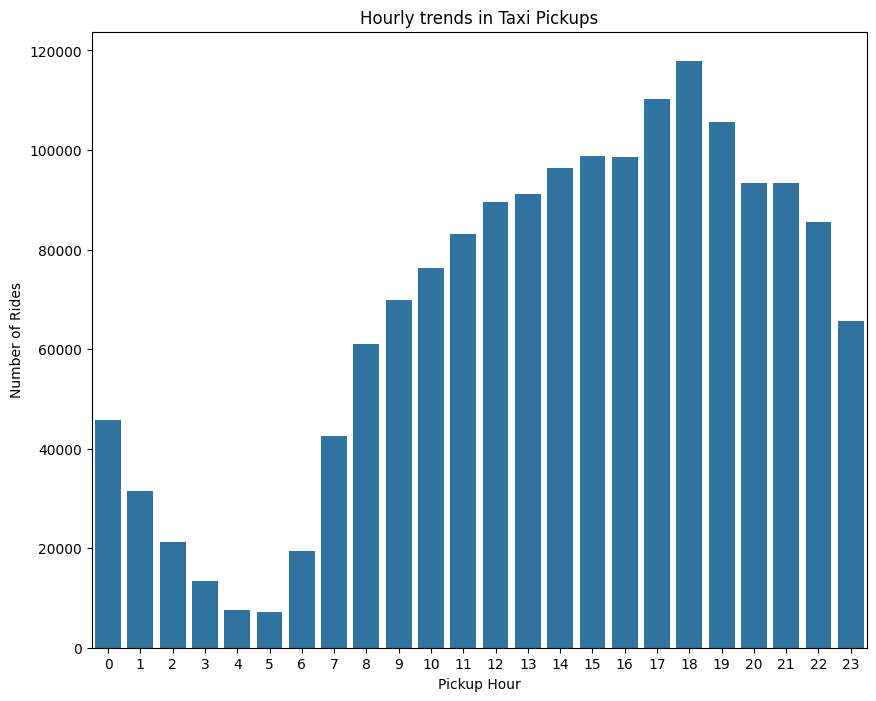

In [71]:
# Find and show the hourly trends in taxi pickups

plt.figure(figsize=(10, 8))
sns.countplot(x=df.pickup_hour)
plt.xlabel("Pickup Hour")
plt.ylabel("Number of Rides")
plt.title("Hourly trends in Taxi Pickups")
plt.show()

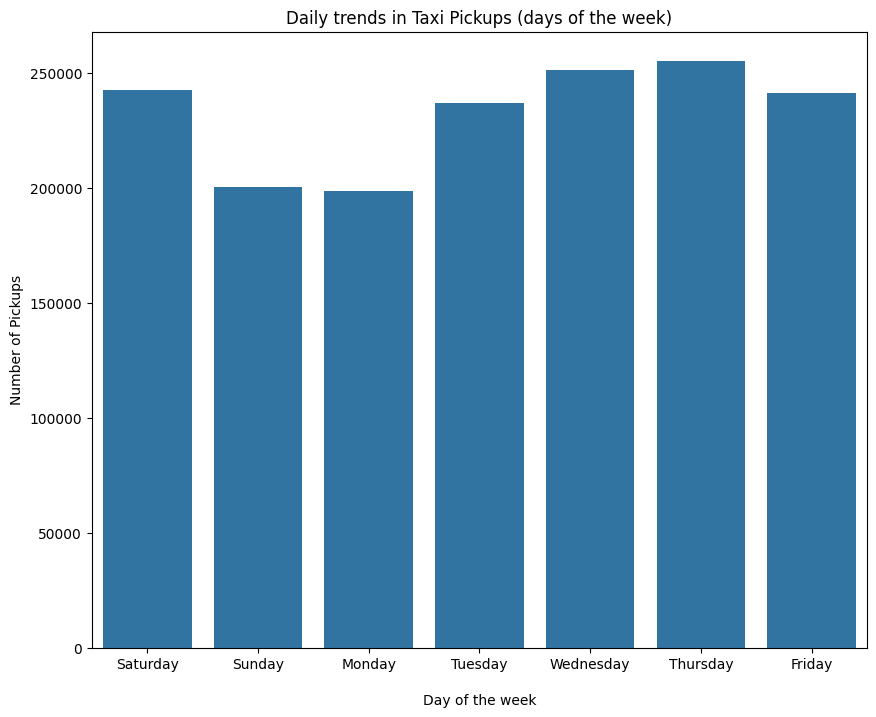

In [72]:
# Find and show the daily trends in taxi pickups (days of the week)

# deriving day using pickup datatime column
df['day']= df['tpep_pickup_datetime'].dt.day_name()

# Plotting a count plot to visualize trends in taxi pickups by day of the week
plt.figure(figsize=(10, 8))
sns.countplot(x=df.day)
plt.xlabel("\nDay of the week")
plt.ylabel("Number of Pickups")
plt.title("Daily trends in Taxi Pickups (days of the week)")
plt.show()

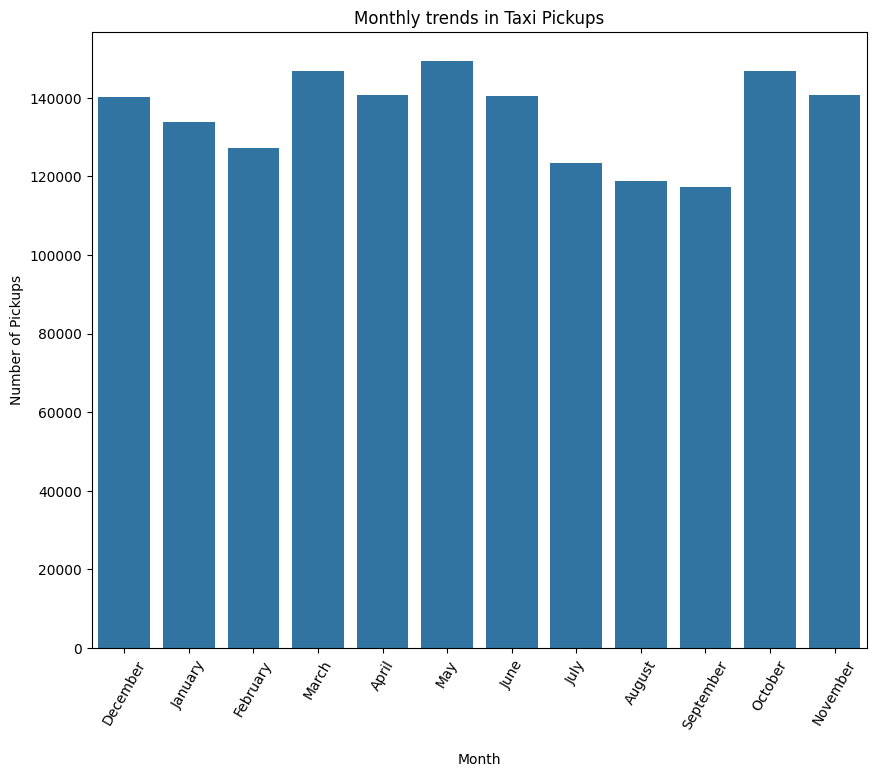

In [73]:
# Show the monthly trends in pickups
# deriving month using pickup datatime column
df['month']= df['tpep_pickup_datetime'].dt.month_name()

# Plotting a count plot to visualize trends in taxi pickups by month
plt.figure(figsize=(10, 8))
sns.countplot(x=df.month)
plt.xlabel("\nMonth")
plt.ylabel("Number of Pickups")
plt.title("Monthly trends in Taxi Pickups")
plt.xticks(rotation=60)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [74]:
# Analyse of the above parameters
print('Zero value count Analysis:')
print((df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']] == 0).sum())

print('\n Negative value count Analysis:')
print((df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']] < 0).sum())


Zero value count Analysis:
fare_amount         520
tip_amount       351503
total_amount        279
trip_distance     16037
dtype: int64

 Negative value count Analysis:
fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [75]:
# Create a df with non zero entries for the selected parameters.

# As we can see
# Zero value count Analysis:
# fare_amount         524
# tip_amount       351508
# total_amount        279
# trip_distance     16037

# these colums have zero values and trip distance and tip amount can be zero so we can leave then as it is.
df2 = df[(df['fare_amount'] > 0) & (df['total_amount'] > 0)].copy()
df2.reset_index(drop=True, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624501 entries, 0 to 1624500
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1624501 non-null  int64         
 1   tpep_pickup_datetime   1624501 non-null  datetime64[us]
 2   tpep_dropoff_datetime  1624501 non-null  datetime64[us]
 3   passenger_count        1624501 non-null  float64       
 4   trip_distance          1624501 non-null  float64       
 5   RatecodeID             1624501 non-null  float64       
 6   PULocationID           1624501 non-null  int64         
 7   DOLocationID           1624501 non-null  int64         
 8   payment_type           1624501 non-null  int64         
 9   fare_amount            1624501 non-null  float64       
 10  extra                  1624501 non-null  float64       
 11  mta_tax                1624501 non-null  float64       
 12  tip_amount             16245

In [76]:
print('Zero value count Analysis DF2:')
print((df2[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']] == 0).sum())

Zero value count Analysis DF2:
fare_amount           0
tip_amount       350989
total_amount          0
trip_distance     15752
dtype: int64


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

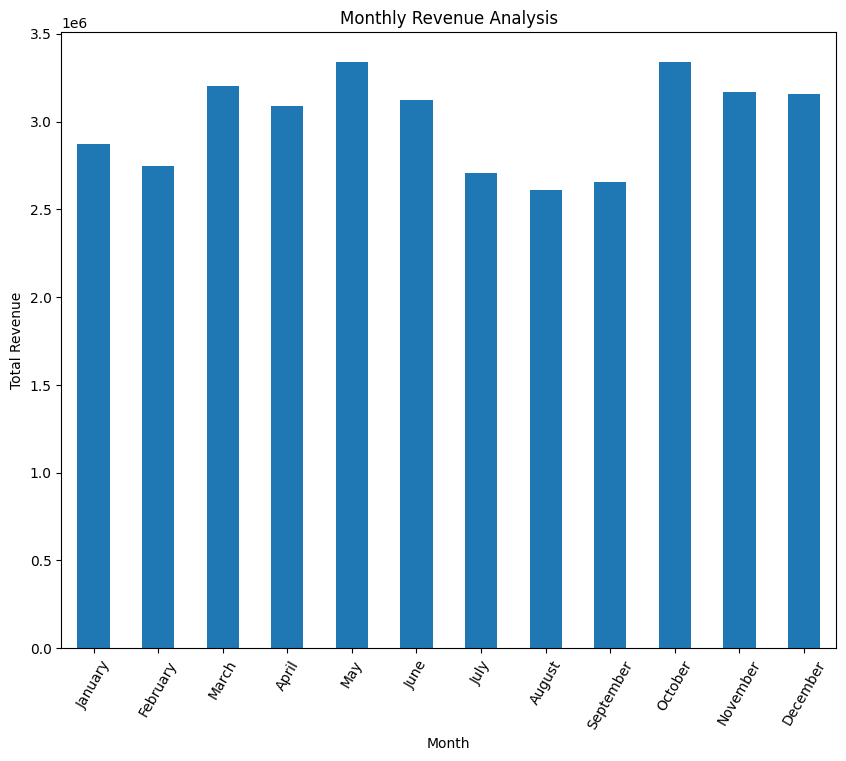

In [77]:
# # Group data by month and analyse monthly revenue
plt.figure(figsize=(10, 8))
# ordering month to a preserve order
ordering_months= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df2.groupby(by=['month'])['total_amount'].sum().reindex(ordering_months).plot(kind='bar')
plt.title("Monthly Revenue Analysis")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=60)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

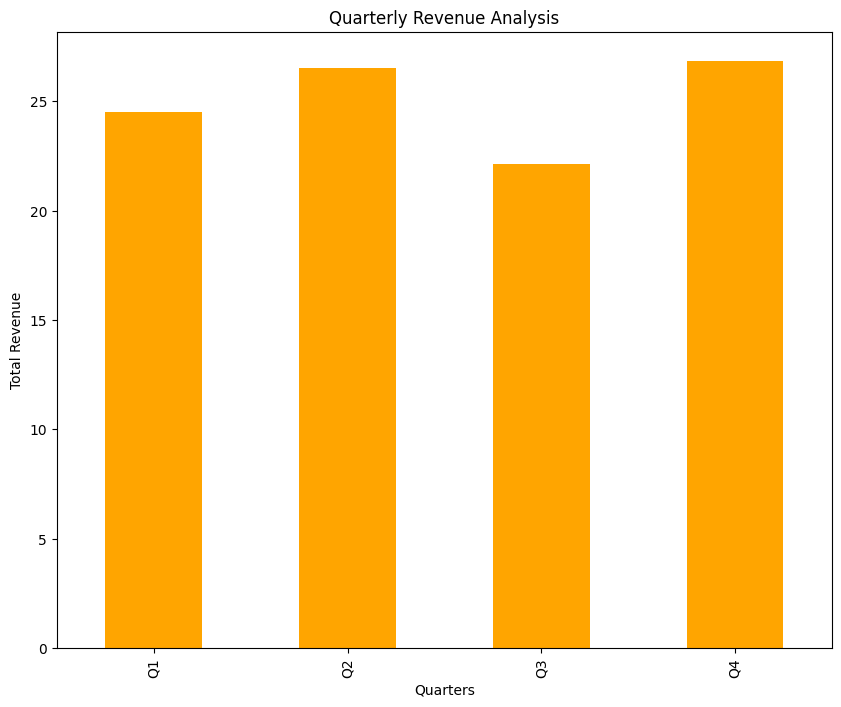

In [78]:
# Calculate proportion of each quarter
# Deriving quaters from pick datetime column
df['quarter'] = df['tpep_pickup_datetime'].dt.quarter
plt.figure(figsize=(10, 8))
quarterly_rev= df.groupby('quarter')['total_amount'].sum()
quarterly_rev_proportion = ((quarterly_rev / quarterly_rev.sum()) * 100).round(2)
quarterly_rev_proportion.plot(kind='bar', color='orange')
plt.title("Quarterly Revenue Analysis")
plt.xlabel("Quarters")
plt.ylabel("Total Revenue")
plt.xticks(ticks=range(4), labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

count   1624501.0000
mean          2.1395
std           1.7560
min           0.0000
25%           1.0000
50%           1.6000
75%           2.6300
max          36.8000
Name: trip_distance, dtype: float64


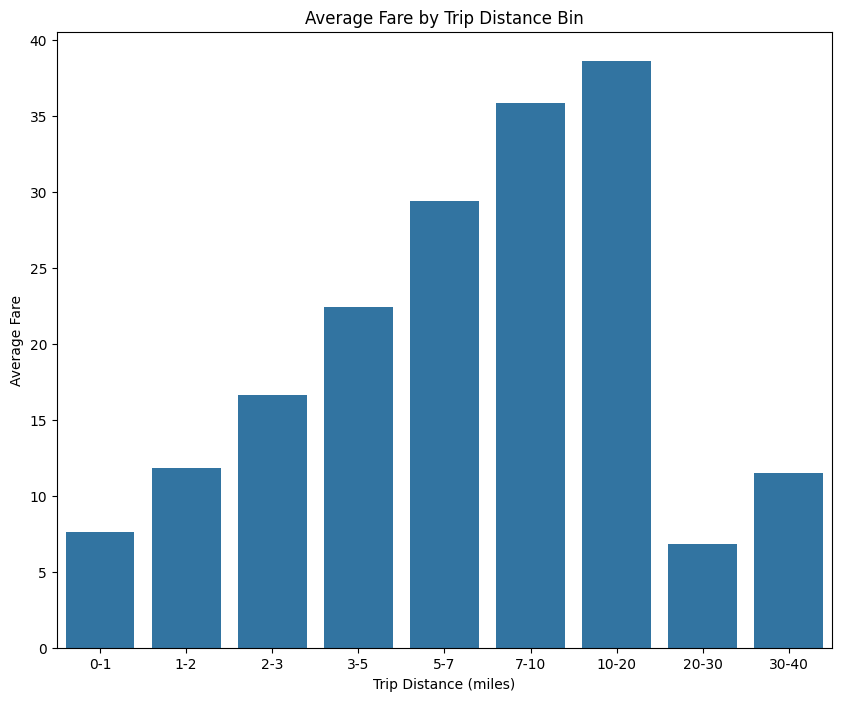

In [79]:
# Show how trip fare is affected by distance
print(df2['trip_distance'].describe())
df3 = df2[df2['trip_distance'] > 0].copy()
# since i remove all trip distance above 10 miles so cut bins til 10 miles
df3['distance_bin'] = pd.cut(df3['trip_distance'],
                             bins=[0, 1, 2, 3, 5, 7, 10, 20, 30, 40],
                             labels=["0-1", "1-2", "2-3", "3-5", "5-7","7-10", "10-20", "20-30", "30-40"])

plt.figure(figsize=(10, 8))
sns.barplot(data=df3, x='distance_bin', y='fare_amount', estimator=np.mean, ci=None)
plt.title("Average Fare by Trip Distance Bin")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Average Fare")
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

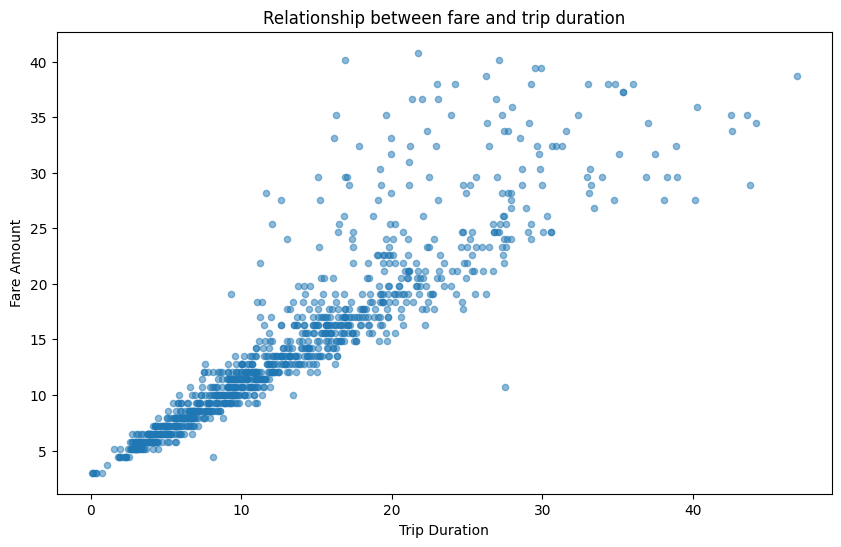

In [80]:
# Show relationship between fare and trip duration
df2[df2['trip_duration'] <= 300].sample(1000, random_state=42).plot.scatter(x='trip_duration', y='fare_amount', figsize=(10, 6), alpha=0.5)
plt.title("Relationship between fare and trip duration")
plt.xlabel("Trip Duration")
plt.ylabel("Fare Amount")
plt.show()

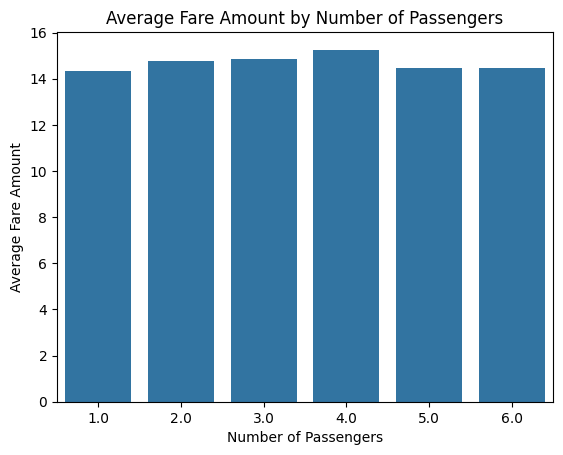

In [81]:
# Show relationship between fare and number of passengers
sns.barplot(data= df2, x='passenger_count', y= 'fare_amount', estimator= np.mean, ci=None)
plt.xlabel("Number of Passengers")
plt.ylabel("Average Fare Amount")
plt.title("Average Fare Amount by Number of Passengers")
plt.show()


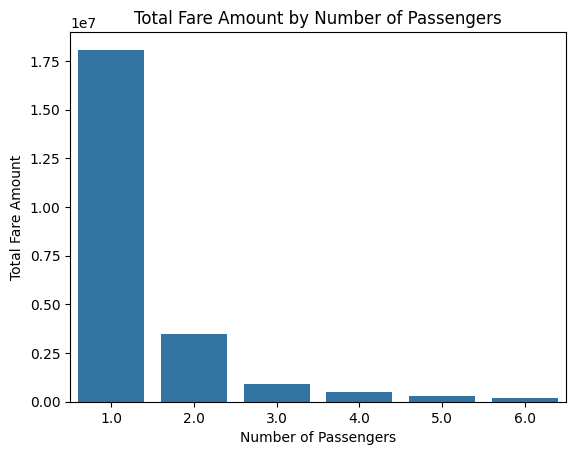

In [82]:
sns.barplot(data= df2, x='passenger_count', y= 'fare_amount', estimator= np.sum, ci=None)
plt.xlabel("Number of Passengers")
plt.ylabel("Total Fare Amount")
plt.title("Total Fare Amount by Number of Passengers")
plt.show()

In [83]:
# Above both analysis for fare amount and passenger count shows
# In the first one the avg fare amount is consistent for passenger count and with passenger count 4 the abg is slightly high.
# Where on the second analysis it is clear when we see total fare amount against passenger people usally ride solo than with multiple passenger.

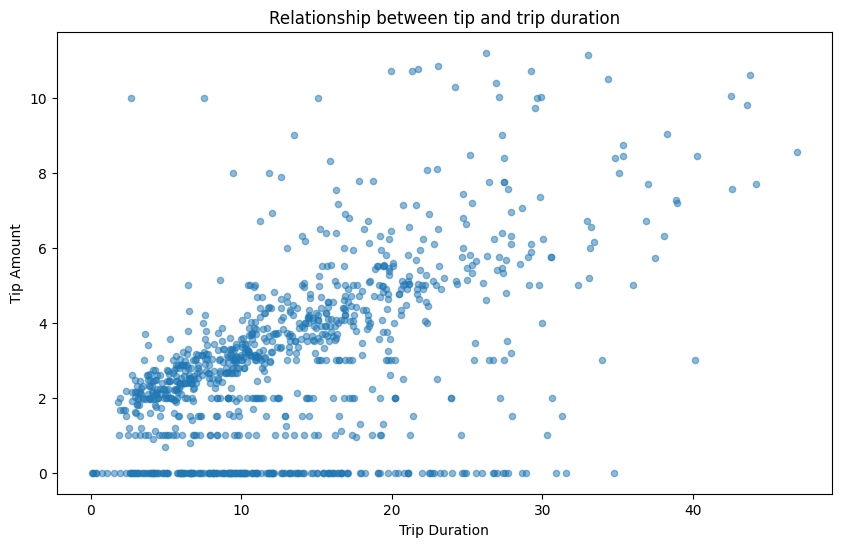

In [84]:
# Show relationship between tip and trip distance
df2[df2['trip_duration'] <= 300].sample(1000, random_state=42).plot.scatter(x='trip_duration', y='tip_amount', figsize=(10, 6), alpha=0.5)
plt.title("Relationship between tip and trip duration")
plt.xlabel("Trip Duration")
plt.ylabel("Tip Amount")
plt.show()


In [85]:
# Above we see a positive relation and trends with a large number of tip is 0 regardless of duration.

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

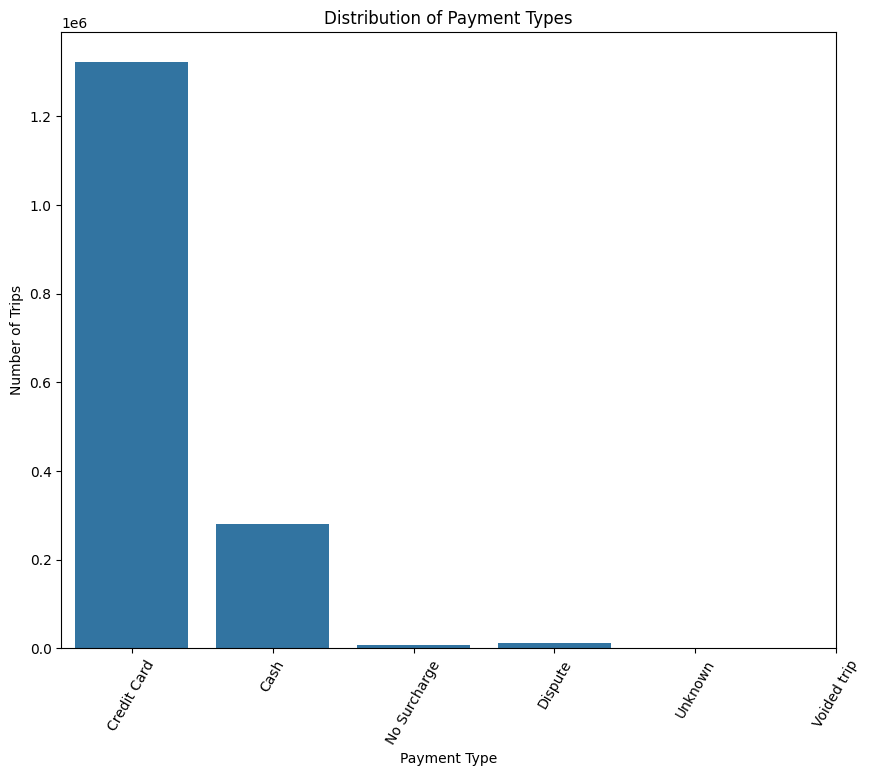

In [86]:
# Analyse the distribution of different payment types (payment_type).
plt.figure(figsize=(10, 8))
sns.countplot(x="payment_type", data=df2)
plt.xlabel("Payment Type")
plt.ylabel("Number of Trips")
plt.title("Distribution of Payment Types")
plt.xticks(ticks= range(6), labels=['Credit Card', 'Cash', 'No Surcharge', 'Dispute', 'Unknown', 'Voided trip'], rotation= 60)
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [87]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [88]:
# import geopandas as gpd
import geopandas as gpd

# Setting path for trip records

import os
os.chdir("/content/drive/MyDrive/EDAassignment/Datasets and Dictionary/taxi_zones")

# Read the shapefile using geopandas
# read the .shp file using gpd
zones = gpd.read_file('taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1      0.1164      0.0008           Newark Airport           1   
1         2      0.4335      0.0049              Jamaica Bay           2   
2         3      0.0843      0.0003  Allerton/Pelham Gardens           3   
3         4      0.0436      0.0001            Alphabet City           4   
4         5      0.0921      0.0005            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

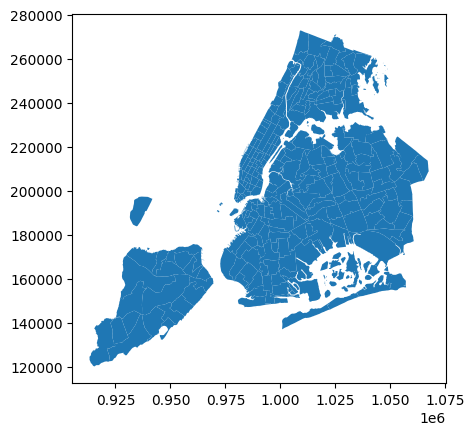

In [89]:
# print(zones.info())
# zones.plot()

print(zones.info())

zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [90]:
# Merge zones and trip records using locationID and PULocationID

# we have PULocationID in records so renaming locationID of zones to PULocationID
zones_renamed = zones.rename(columns={'LocationID': 'PULocationID'})
df_zones = df2.merge(zones_renamed, on='PULocationID', how='left')
df_zones.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06           1.0000   
1         2  2023-01-01 00:00:57   2023-01-01 00:15:11           1.0000   
2         2  2023-01-01 00:03:01   2023-01-01 00:10:15           1.0000   
3         1  2023-01-01 00:03:48   2023-01-01 00:17:51           1.0000   
4         1  2023-01-01 00:04:34   2023-01-01 00:17:32           1.0000   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0         0.8600      1.0000           141           140             1   
1         9.9800      1.0000           138            97             1   
2         1.2500      1.0000           141           236             1   
3         6.0000      1.0000           137            25             1   
4         1.6000      1.0000           125           186             1   

   fare_amount  ...  pickup_hour  trip_duration       day     month  OBJECTID  \
0       6.5000  ...           23         4.6000  Saturday  December  141.0000   
1      38.0000  ...            0        14.2300    Sunday   January  138.0000   
2       9.3000  ...            0         7.2300    Sunday   January  141.0000   
3      25.4000  ...            0        14.0500    Sunday   January  137.0000   
4      12.8000  ...            0        12.9700    Sunday   January  125.0000   

   Shape_Leng  Shape_Area               zone    borough  \
0      0.0415      0.0001    Lenox Hill West  Manhattan   
1      0.1075      0.0005  LaGuardia Airport     Queens   
2      0.0415      0.0001    Lenox Hill West  Manhattan   
3      0.0461      0.0001           Kips Bay  Manhattan   
4      0.0497      0.0001          Hudson Sq  Manhattan   

                                            geometry  
0  POLYGON ((994839.073 216123.698, 994786.74 216...  
1  MULTIPOLYGON (((1019904.219 225677.983, 102031...  
2  POLYGON ((994839.073 216123.698, 994786.74 216...  
3  POLYGON ((991954.728 209026.462, 991949.076 20...  
4  POLYGON ((983503.558 204621.022, 983654.398 20...  

[5 rows x 28 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [91]:
# Group data by location and calculate the number of trips

trip_counts = df_zones.groupby("PULocationID").size().reset_index(name="trip_count")
trip_counts.head()


PULocationID  trip_count
0             1          43
1             3           5
2             4        1781
3             6          20
4             7         744

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [92]:
# Merge trip counts back to the zones GeoDataFrame
zones_trips = zones_renamed.merge(trip_counts, on="PULocationID", how="left")
zones_trips.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  PULocationID  \
0         1      0.1164      0.0008           Newark Airport             1   
1         2      0.4335      0.0049              Jamaica Bay             2   
2         3      0.0843      0.0003  Allerton/Pelham Gardens             3   
3         4      0.0436      0.0001            Alphabet City             4   
4         5      0.0921      0.0005            Arden Heights             5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0     43.0000  
1         NaN  
2      5.0000  
3   1781.0000  
4         NaN

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

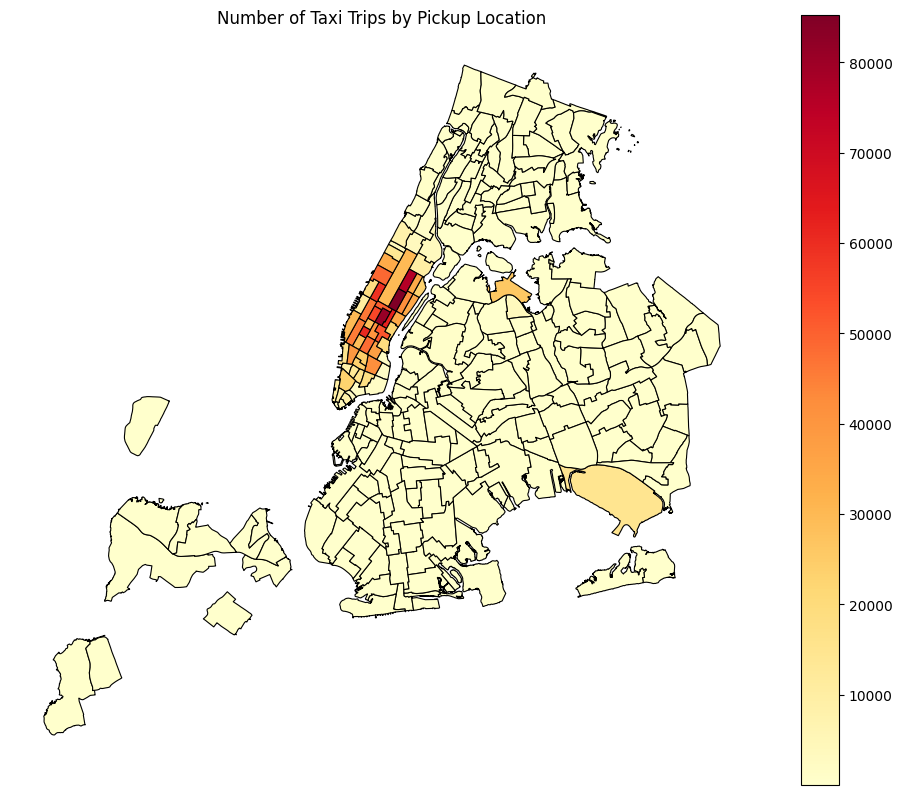

In [93]:
# Define figure and axis
fig, ax= plt.subplots(1, 1, figsize= (12, 10))
# Plot the map and display it
zones_trips.plot(column="trip_count", cmap="YlOrRd", linewidth=0.8, edgecolor="black", legend=True, ax= ax)
plt.title("Number of Taxi Trips by Pickup Location")
plt.axis("off")
plt.show()



In [94]:
# can you try displaying the zones DF sorted by the number of trips?

zones_trips.sort_values(by='trip_count', ascending=False).head(10)


OBJECTID  Shape_Leng  Shape_Area                          zone  \
236       237      0.0422      0.0001         Upper East Side South   
160       161      0.0358      0.0001                Midtown Center   
235       236      0.0443      0.0001         Upper East Side North   
161       162      0.0353      0.0000                  Midtown East   
185       186      0.0247      0.0000  Penn Station/Madison Sq West   
141       142      0.0382      0.0001           Lincoln Square East   
229       230      0.0310      0.0001     Times Sq/Theatre District   
169       170      0.0458      0.0001                   Murray Hill   
162       163      0.0342      0.0000                 Midtown North   
238       239      0.0636      0.0002         Upper West Side South   

     PULocationID    borough  \
236           237  Manhattan   
160           161  Manhattan   
235           236  Manhattan   
161           162  Manhattan   
185           186  Manhattan   
141           142  Manhattan   
229           230  Manhattan   
169           170  Manhattan   
162           163  Manhattan   
238           239  Manhattan   

                                              geometry  trip_count  
236  POLYGON ((993633.442 216961.016, 993507.232 21...  85231.0000  
160  POLYGON ((991081.026 214453.698, 990952.644 21...  81011.0000  
235  POLYGON ((995940.048 221122.92, 995812.322 220...  76109.0000  
161  POLYGON ((992224.354 214415.293, 992096.999 21...  62545.0000  
185  POLYGON ((986752.603 210853.699, 986627.863 21...  60860.0000  
141  POLYGON ((989380.305 218980.247, 989359.803 21...  58983.0000  
229  POLYGON ((988786.877 214532.094, 988650.277 21...  54907.0000  
169  POLYGON ((991999.299 210994.739, 991972.635 21...  52035.0000  
162  POLYGON ((989412.663 219020.943, 990045.841 21...  50526.0000  
238  POLYGON ((991168.979 226252.992, 991955.565 22...  48803.0000

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [95]:
# Find routes which have the slowest speeds at different times of the day
df_zones['trip_duration_hr'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600
df_zones["speed_mph"] = df_zones.apply(lambda x: x.trip_distance / x.trip_duration_hr if x.trip_duration_hr > 0 else 0, axis=1)
df_zones['hour'] = df_zones['tpep_pickup_datetime'].dt.hour
df_zones['route'] = df_zones['PULocationID'].astype(str) + ' to ' + df_zones['DOLocationID'].astype(str)
df_routes = df_zones.groupby(['hour', 'route'])['speed_mph'].mean().reset_index()
df_routes.head()

hour       route  speed_mph
0     0    10 to 76     0.0000
1     0  100 to 100     6.4205
2     0  100 to 106    10.4266
3     0  100 to 107    11.2959
4     0  100 to 112     7.6888

In [96]:
# create a zones dict against LocationID
zones_dict = zones.set_index('LocationID')['zone'].to_dict()
df_routes[['pickupID', 'dropID']] = df_routes['route'].str.split(' to ', expand=True).astype(int)
df_routes['pickup_zone'] = df_routes['pickupID'].map(zones_dict)
df_routes['dropoff_zone'] = df_routes['dropID'].map(zones_dict)
df_routes['route_name'] = df_routes['pickup_zone'] + ' to ' + df_routes['dropoff_zone']

In [97]:
# Get the route with the minimum speed at each hour
df_slowest = df_routes.dropna(subset=["route_name"])
df_slowest = df_slowest[df_slowest["speed_mph"] > 0]
df_slowest = df_slowest.loc[df_slowest.groupby("hour")["speed_mph"].idxmin(), ["hour", "route_name", "speed_mph"]]
df_slowest = df_slowest.drop_duplicates(subset=["hour"])
df_slowest

hour                                         route_name  speed_mph
2078      0                                 Seaport to Seaport     0.0211
5728      1  Long Island City/Queens Plaza to Long Island C...     0.0408
9407      2             LaGuardia Airport to LaGuardia Airport     0.0461
13283     3                       Midtown East to Midtown East     0.0235
17317     4                       Clinton West to Clinton West     0.0367
18717     5  Sutton Place/Turtle Bay North to Sutton Place/...     0.0229
19912     6               Hamilton Heights to Hamilton Heights     0.0137
23927     7  Saint Michaels Cemetery/Woodside to Saint Mich...     0.0043
27467     8  Queensbridge/Ravenswood to Queensbridge/Ravens...     0.0259
33322     9                     East Elmhurst to East Elmhurst     0.0066
35574    10  Saint Michaels Cemetery/Woodside to Saint Mich...     0.0011
41732    11                 Astoria to Queensbridge/Ravenswood     0.0103
43351    12                    Lower East Side to Battery Park     0.0713
48518    13                             Bellerose to Bellerose     0.0167
52949    14  Queensbridge/Ravenswood to Queensbridge/Ravens...     0.0448
56758    15                   Manhattanville to Manhattanville     0.0739
60371    16                 Jackson Heights to Jackson Heights     0.0101
64383    17                   Newark Airport to Newark Airport     0.0221
68992    18                   Newark Airport to Newark Airport     0.0468
77631    19                     Alphabet City to Alphabet City     0.2215
79079    20               Hamilton Heights to Hamilton Heights     0.0221
86418    21  Two Bridges/Seward Park to Two Bridges/Seward ...     0.0625
88700    22                        Baisley Park to JFK Airport     0.0213
96142    23               Bensonhurst East to Bensonhurst East     0.1687

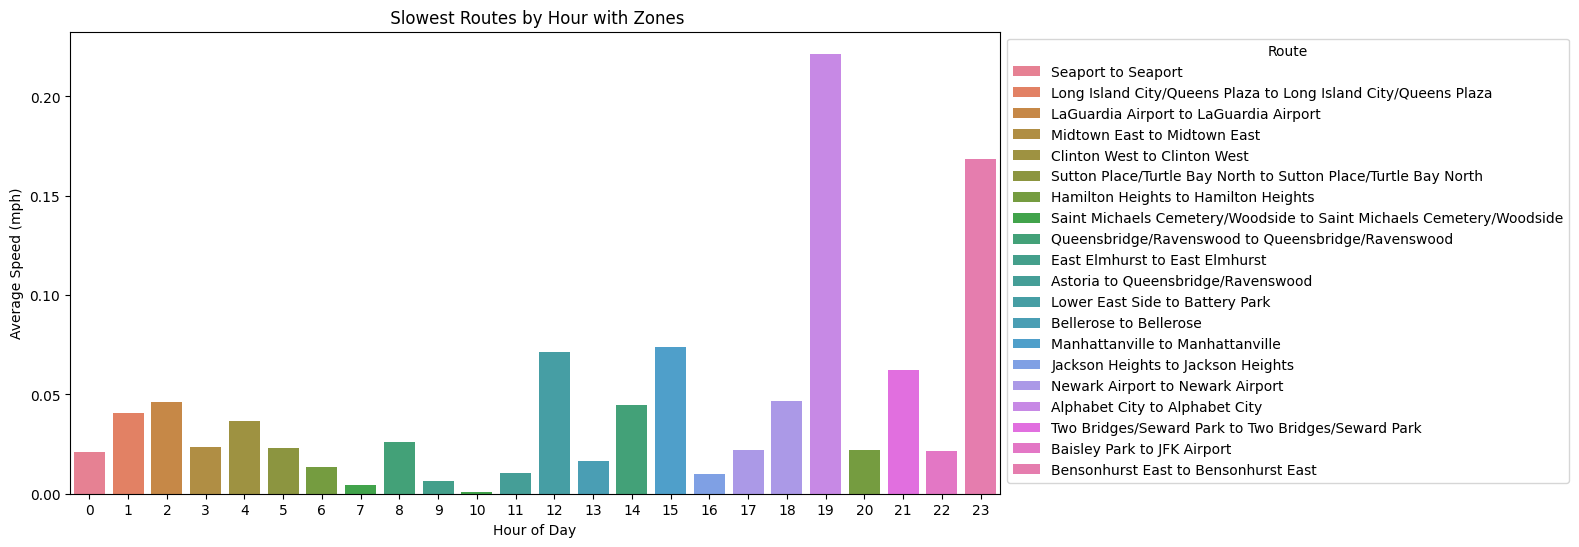

In [98]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_slowest, x='hour', y='speed_mph', hue='route_name', dodge=False)
plt.title(" Slowest Routes by Hour with Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Average Speed (mph)")
plt.legend(title="Route", bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

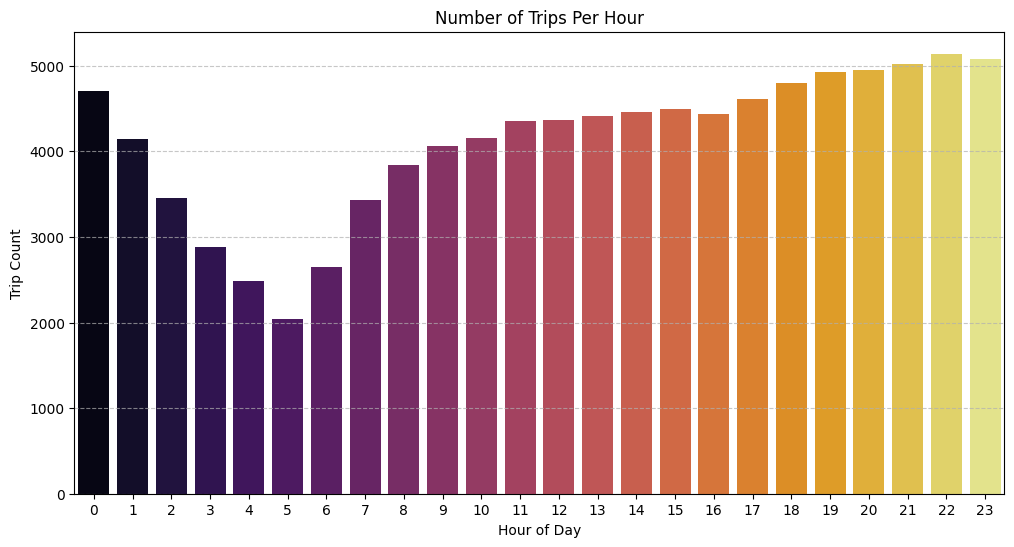

In [99]:
# Visualise the number of trips per hour and find the busiest hour
plt.figure(figsize=(12, 6))

trips_per_hour = df_routes['hour'].value_counts().sort_index()
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette="inferno")

plt.title("Number of Trips Per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Trip Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [100]:
# Scale up the number of trips
trips_per_hour = df_routes.groupby("hour")["route_name"].count()
sample_fraction = 0.1
df_hourly_scaled = (trips_per_hour / sample_fraction).round().astype(int)
print(f"Actual number of trips after scaleup using 10% sampling: \n{df_hourly_scaled}")
busiest_hours = df_hourly_scaled.nlargest(5)
print(f"Five Busiest {busiest_hours}")
busiest_hour = df_hourly_scaled.idxmax()
max_trips = df_hourly_scaled.max()

print(f"\nBusiest Hour: {busiest_hour} with {max_trips} trips")


Actual number of trips after scaleup using 10% sampling: 
hour
0     45990
1     40610
2     33850
3     28330
4     24440
5     20230
6     25950
7     33470
8     37420
9     39550
10    40460
11    42350
12    42500
13    42880
14    43300
15    43770
16    43160
17    44850
18    46690
19    47950
20    48300
21    48980
22    50150
23    49590
Name: route_name, dtype: int64
Five Busiest hour
22    50150
23    49590
21    48980
20    48300
19    47950
Name: route_name, dtype: int64

Busiest Hour: 22 with 50150 trips


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

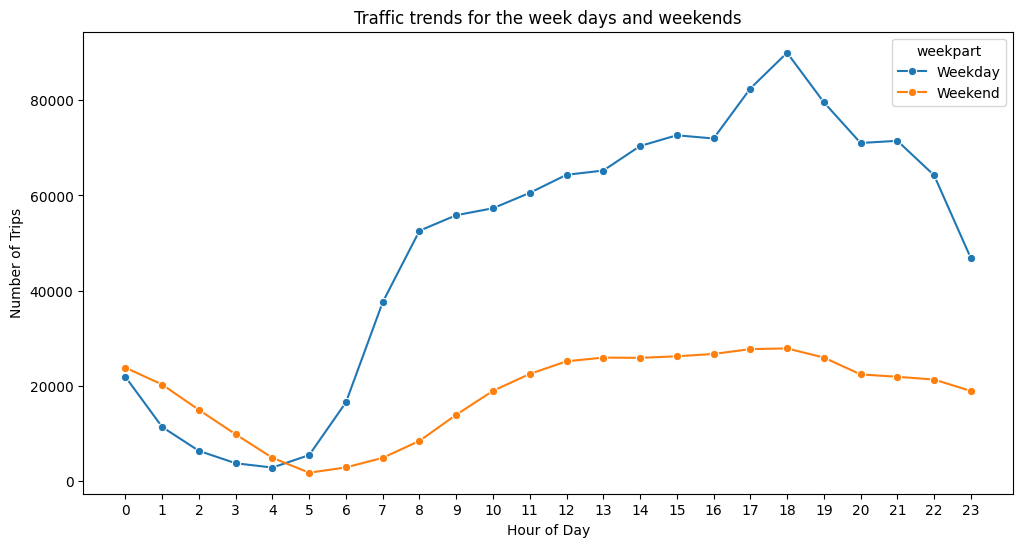

In [101]:
# Compare traffic trends for the week days and weekends
# Create a new column to classify weekday/weekend
df_zones['weekpart']= df_zones['day'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
# Count number of trips by hour and weekpart
trips_aggr = df_zones.groupby(['hour', 'weekpart']).size().reset_index(name='trip_count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=trips_aggr, x='hour', y='trip_count', hue='weekpart', marker='o')

plt.title("Traffic trends for the week days and weekends")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [102]:
# Deriving Zones name in df2 using PUlocationID and DOLocationID

zones_pickup = zones.rename(columns={"LocationID": "PULocationID", "zone": "pickup_zone"})
zones_dropoff = zones.rename(columns={"LocationID": "DOLocationID", "zone": "dropoff_zone"})
df2 = df2.merge(zones_pickup[["PULocationID", "pickup_zone"]], on="PULocationID", how="left")
df2 = df2.merge(zones_dropoff[["DOLocationID", "dropoff_zone"]], on="DOLocationID", how="left")
df2[["PULocationID", "pickup_zone", "DOLocationID", "dropoff_zone"]].head()

PULocationID        pickup_zone  DOLocationID                  dropoff_zone
0           141    Lenox Hill West           140               Lenox Hill East
1           138  LaGuardia Airport            97                   Fort Greene
2           141    Lenox Hill West           236         Upper East Side North
3           137           Kips Bay            25                   Boerum Hill
4           125          Hudson Sq           186  Penn Station/Madison Sq West

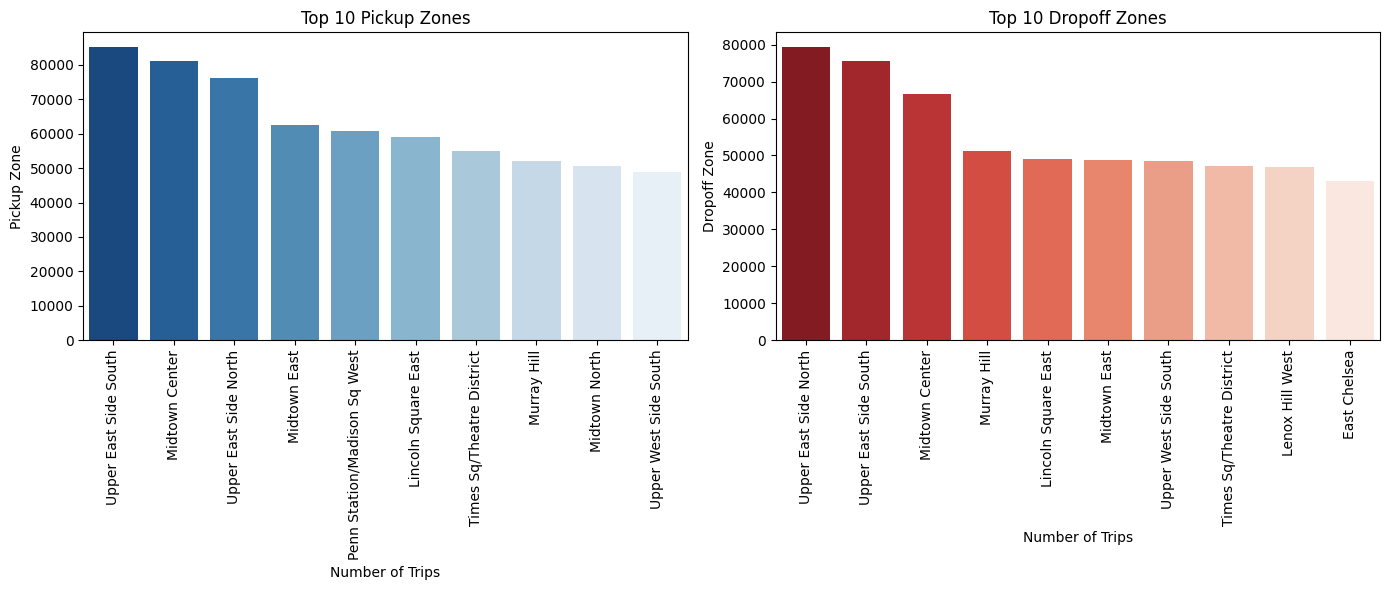

In [103]:
top_pickup_zones = df2["pickup_zone"].value_counts().nlargest(10)
top_dropoff_zones = df2["dropoff_zone"].value_counts().nlargest(10)

plt.figure(figsize=(14, 6))

# Plot for Pickup Zones
plt.subplot(1, 2, 1)
sns.barplot(x=top_pickup_zones.index, y=top_pickup_zones.values, palette="Blues_r")
plt.title("Top 10 Pickup Zones")
plt.xlabel("Number of Trips")
plt.xticks(rotation= 90)
plt.ylabel("Pickup Zone")

# Plot for Dropoff Zones
plt.subplot(1, 2, 2)
sns.barplot(x=top_dropoff_zones.index, y=top_dropoff_zones.values, palette="Reds_r")
plt.title("Top 10 Dropoff Zones")
plt.xlabel("Number of Trips")
plt.ylabel("Dropoff Zone")
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [104]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df2["pickup_zone"].value_counts()
dropoff_counts = df2["dropoff_zone"].value_counts()

zone_ratios = pd.DataFrame({
    "pickup_count": pickup_counts,
    "dropoff_count": dropoff_counts
}).fillna(0)

zone_ratios["pickup_dropoff_ratio"] = zone_ratios["pickup_count"] / zone_ratios["dropoff_count"].replace(0, np.nan)

top_10_ratios = zone_ratios.nlargest(10, "pickup_dropoff_ratio")
bottom_10_ratios = zone_ratios.nsmallest(10, "pickup_dropoff_ratio")



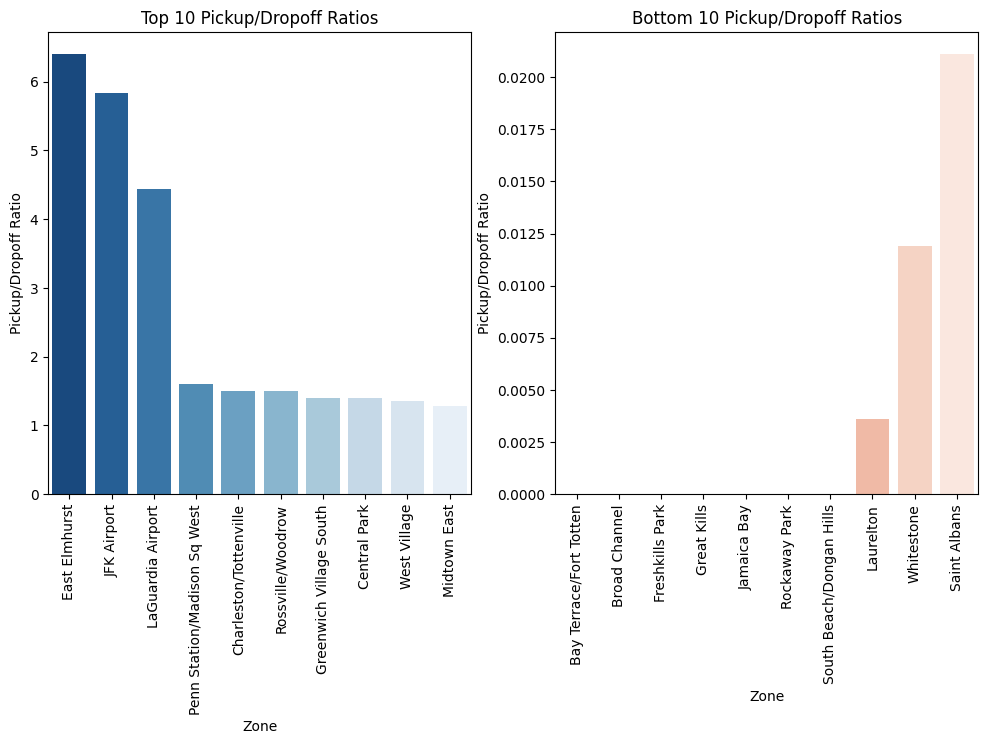

In [105]:
# Plot the top 10 pickup/dropoff ratios
plt.figure(figsize=(12, 6))

# Top 10
plt.subplot(1, 2, 1)
sns.barplot(x=top_10_ratios.index, y=top_10_ratios["pickup_dropoff_ratio"], palette="Blues_r")
plt.title("Top 10 Pickup/Dropoff Ratios")
plt.xlabel("Zone")
plt.ylabel("Pickup/Dropoff Ratio")
plt.xticks(rotation=90)

# Bottom 10
plt.subplot(1, 2, 2)
sns.barplot(x=bottom_10_ratios.index, y=bottom_10_ratios["pickup_dropoff_ratio"], palette="Reds_r")
plt.title("Bottom 10 Pickup/Dropoff Ratios")
plt.xlabel("Zone")
plt.ylabel("Pickup/Dropoff Ratio")
plt.xticks(rotation=90)
plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

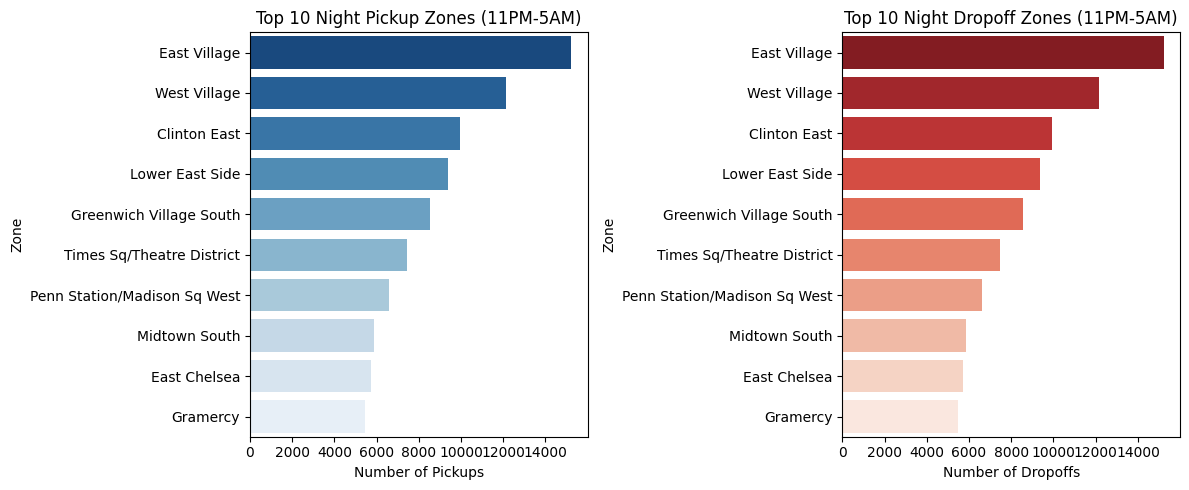

In [106]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

df_night = df_zones[(df_zones["hour"] >= 23) | (df_zones["hour"] <= 5)]

night_pickup_counts = df_night["zone"].value_counts()
night_dropoff_counts = df_night["zone"].value_counts()

top_10_night_pickups = night_pickup_counts.nlargest(10)
top_10_night_dropoffs = night_dropoff_counts.nlargest(10)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=top_10_night_pickups.values, y=top_10_night_pickups.index, palette="Blues_r")
plt.title("Top 10 Night Pickup Zones (11PM-5AM)")
plt.xlabel("Number of Pickups")
plt.ylabel("Zone")

plt.subplot(1, 2, 2)
sns.barplot(x=top_10_night_dropoffs.values, y=top_10_night_dropoffs.index, palette="Reds_r")
plt.title("Top 10 Night Dropoff Zones (11PM-5AM)")
plt.xlabel("Number of Dropoffs")
plt.ylabel("Zone")

plt.tight_layout()
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [107]:
# Filter for night hours (11 PM to 5 AM)
df_night = df_zones[(df_zones["hour"] >= 23) | (df_zones["hour"] <= 5)]
df_day = df_zones[(df_zones["hour"] >= 6) & (df_zones["hour"] <= 22)]
night_revenue = df_night['fare_amount'].sum().round(2)
day_revenue = df_day['fare_amount'].sum().round(2)
night_revenue_share = round((night_revenue / (night_revenue + day_revenue)) * 100, 2)
day_revenue_share = round((day_revenue / (night_revenue + day_revenue)) * 100, 2)

print("Total Revenue for Night Hours:", night_revenue)
print("Total Revenue for Day Hours:", day_revenue)
print("Revenue Share for Night Hours:", night_revenue_share, "%")
print("Revenue Share for Day Hours:", day_revenue_share, "%")


Total Revenue for Night Hours: 2880325.52
Total Revenue for Day Hours: 20594844.46
Revenue Share for Night Hours: 12.27 %
Revenue Share for Day Hours: 87.73 %


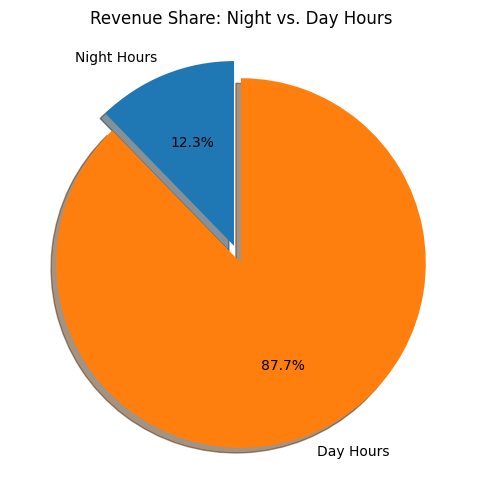

In [108]:
labels = ['Night Hours', 'Day Hours']
sizes = [night_revenue_share, day_revenue_share]
colors = ['#1f77b4', '#ff7f0e']
explode = (0.1, 0)

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=90, shadow=True)
plt.title("Revenue Share: Night vs. Day Hours")
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

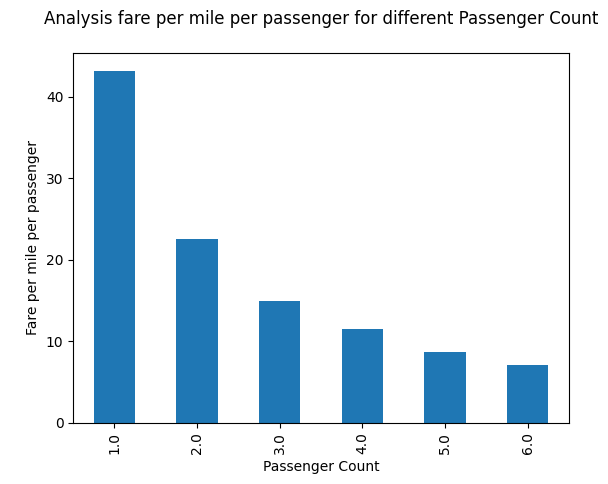

In [109]:
# Analyse the fare per mile per passenger for different passenger counts

df3['fare_per_mile_per_passenger']= df3.fare_amount / df3.passenger_count * df3.trip_distance
avg_fare_per_passenger= df3.groupby(by=['passenger_count'])['fare_per_mile_per_passenger'].mean()
avg_fare_per_passenger.plot.bar()
plt.title("Analysis fare per mile per passenger for different Passenger Count\n")
plt.xlabel("Passenger Count")
plt.ylabel("\nFare per mile per passenger")
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [110]:
# Compare the average fare per mile for different days and for different times of the day

# Deriving fare per mile
df3['fare_per_mile'] = df3.fare_amount / df3.trip_distance
df3.fare_per_mile.value_counts()

fare_per_mile
10.0000    10412
8.0000      8672
9.0000      6798
9.2857      5767
9.6667      5345
           ...  
17.4312        1
6.9002         1
7.2909         1
20.3333        1
8.1897         1
Name: count, Length: 24994, dtype: int64

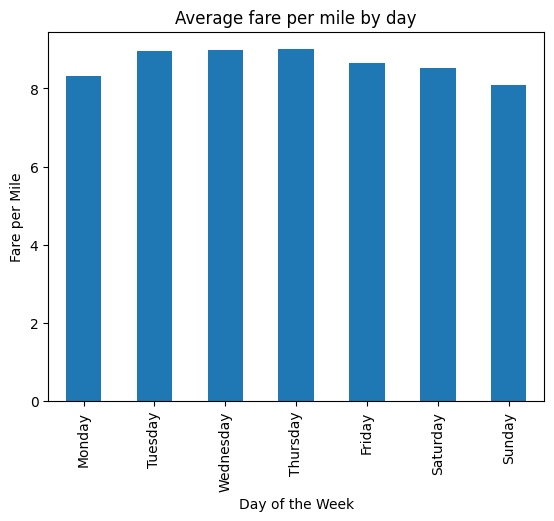

In [111]:
# Group the fare per mile by day and using agg mean for avg
day_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_per_mile_by_day = df3.groupby('day')['fare_per_mile'].mean().reindex(day_order).round(2)
fare_per_mile_by_day.plot.bar()
plt.title('Average fare per mile by day')
plt.xlabel('Day of the Week')
plt.ylabel('Fare per Mile')
plt.show()

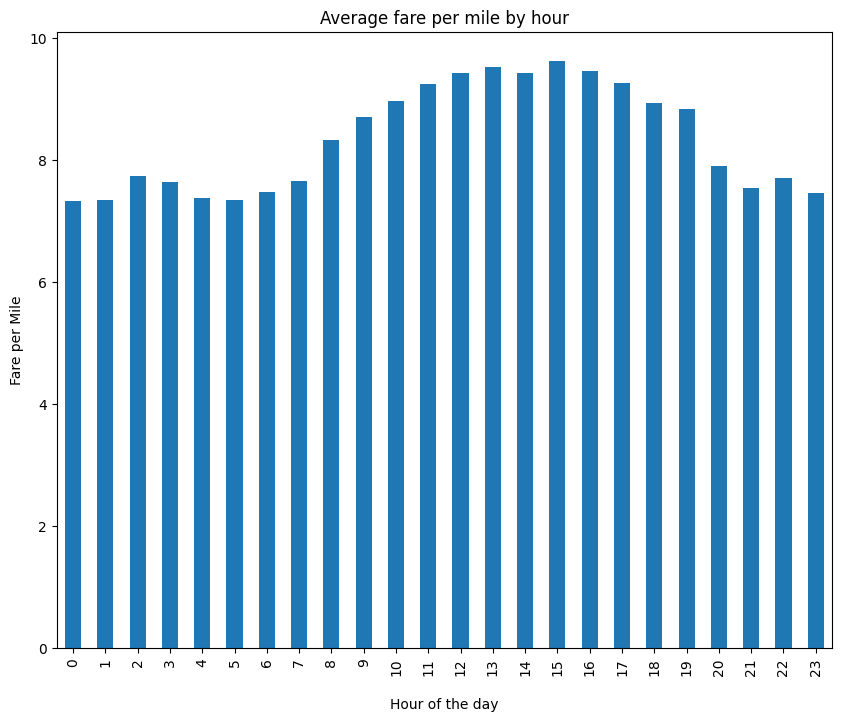

In [112]:
# Group the fare per mile by hour and using agg mean for avg

fare_per_mile_by_hour = df3.groupby('pickup_hour')['fare_per_mile'].mean().round(2)
plt.figure(figsize=(10,8))
fare_per_mile_by_hour.plot.bar()
plt.title('Average fare per mile by hour')
plt.xlabel('\nHour of the day')
plt.ylabel('Fare per Mile')
plt.xticks(range(0, 24))
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

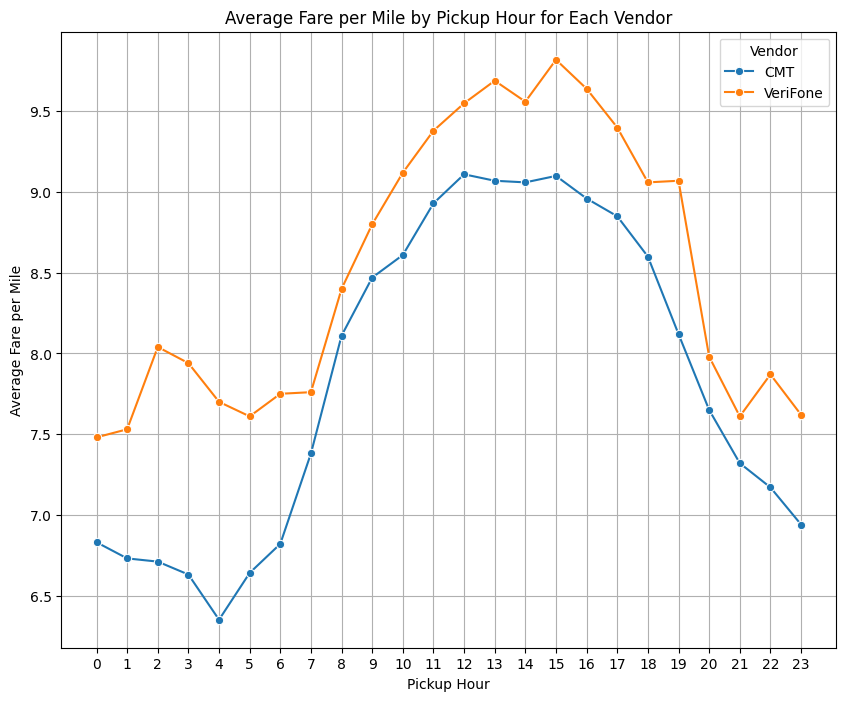

In [113]:
# Compare fare per mile for different vendors

# Mapping VendorID to vendor names
vendor_dict = {1: 'CMT', 2: 'VeriFone'}
df3['vendorName']= df3['VendorID'].apply(lambda x: vendor_dict[x])

vendor_permile_for_each_hour = df3.groupby(by=['vendorName', 'pickup_hour'])['fare_per_mile'].mean().round(2).reset_index()
plt.figure(figsize=(10,8))
sns.lineplot(data=vendor_permile_for_each_hour, x='pickup_hour', y='fare_per_mile', hue='vendorName', marker='o')
plt.xlabel("Pickup Hour")
plt.ylabel("Average Fare per Mile")
plt.title("Average Fare per Mile by Pickup Hour for Each Vendor")
plt.xticks(range(0, 24))
plt.legend(title="Vendor")
plt.grid(True)
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


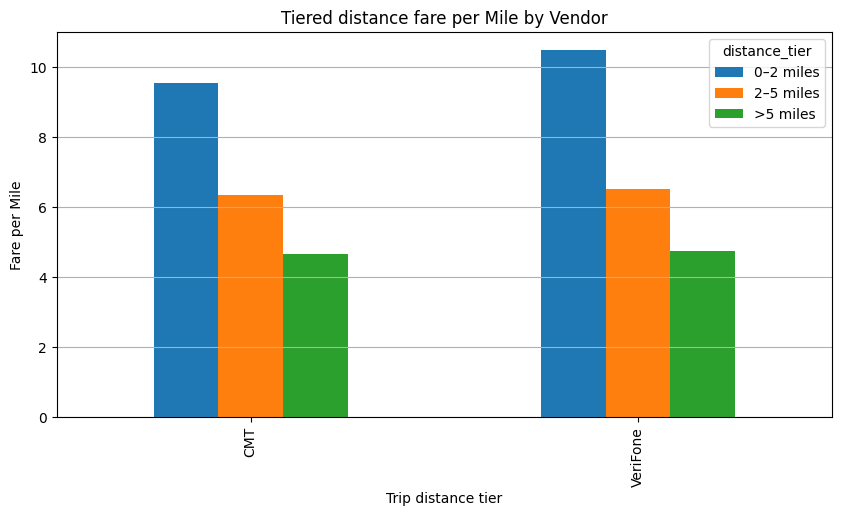

In [114]:
# Defining distance tiers

# Deriving 3 tier as per the 3.2.12 using trip_distance
df3['distance_tier'] = pd.cut(df3['trip_distance'],bins=[0, 2, 5, float('inf')],labels=['0–2 miles', '2–5 miles', '>5 miles'])

vender_tiered_distance_fare = df3.groupby(['vendorName', 'distance_tier'])['fare_per_mile'].mean().round(2).unstack()

vender_tiered_distance_fare.plot(kind='bar', figsize=(10, 5))
plt.grid(axis='y')
plt.title("Tiered distance fare per Mile by Vendor")
plt.ylabel("Fare per Mile")
plt.xlabel("Trip distance tier")
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

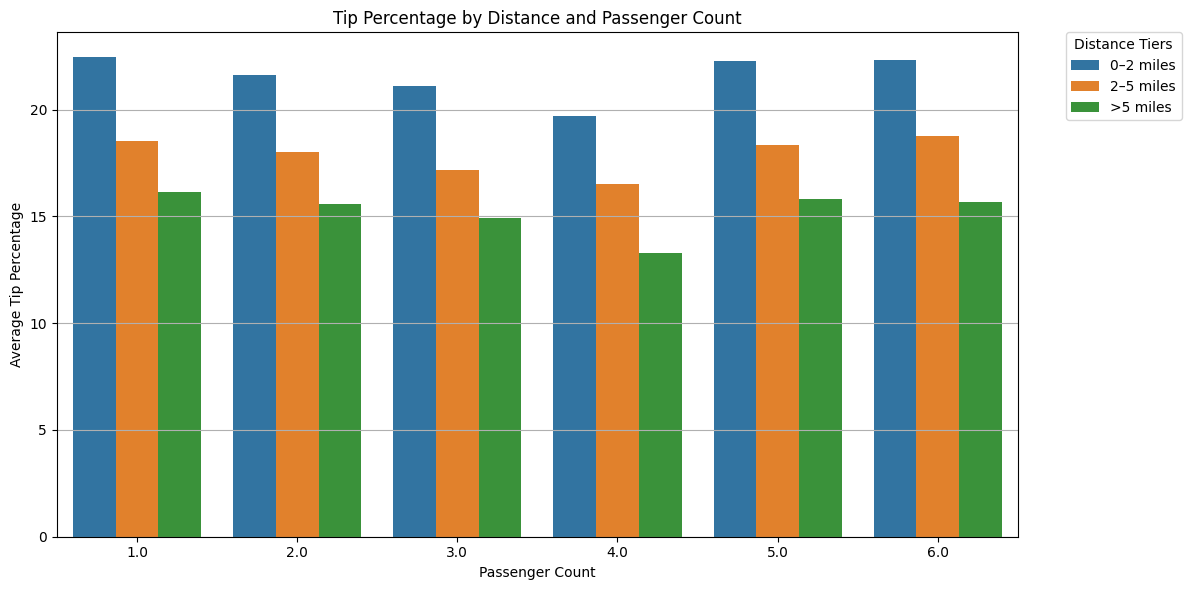

In [115]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df3['tip_percentage'] = (df3['tip_amount'] / df3['fare_amount']) * 100
avg_tip_perc_on_dis_passen_pickups = df3.groupby(['distance_tier', 'passenger_count', 'pickup_hour'])['tip_percentage'].mean().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=avg_tip_perc_on_dis_passen_pickups, x='passenger_count', y='tip_percentage', hue='distance_tier', ci=False)
plt.xlabel("Passenger Count")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage by Distance and Passenger Count")
plt.grid(axis='y')
plt.legend(title="Distance Tiers", loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.tight_layout()
plt.show()




Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [116]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

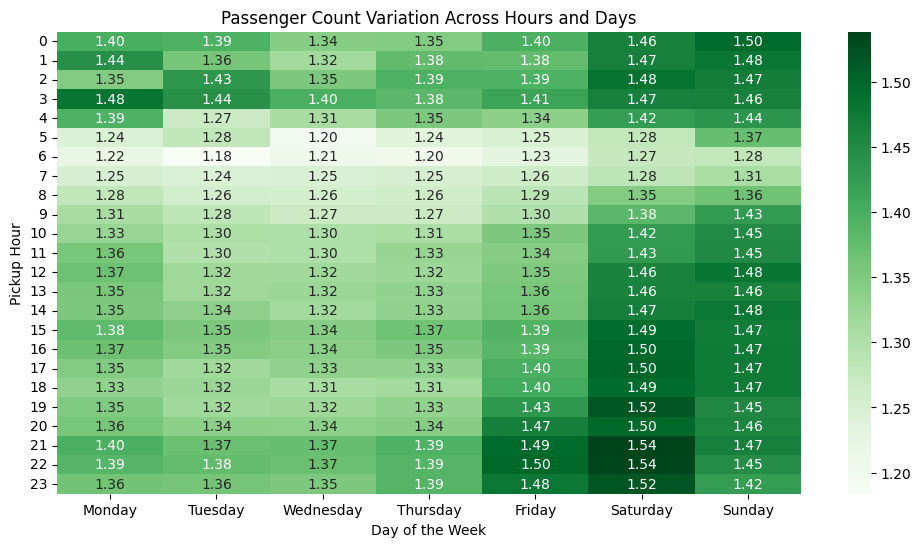

In [117]:
# See how passenger count varies across hours and days

passenger_count_hours_and_days= df3.groupby(by=['pickup_hour', 'day'])['passenger_count'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(passenger_count_hours_and_days[day_order], cmap="Greens", annot=True, fmt=".2f")
plt.xlabel("Day of the Week")
plt.ylabel("Pickup Hour")
plt.title("Passenger Count Variation Across Hours and Days")
plt.yticks(rotation= 0)
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

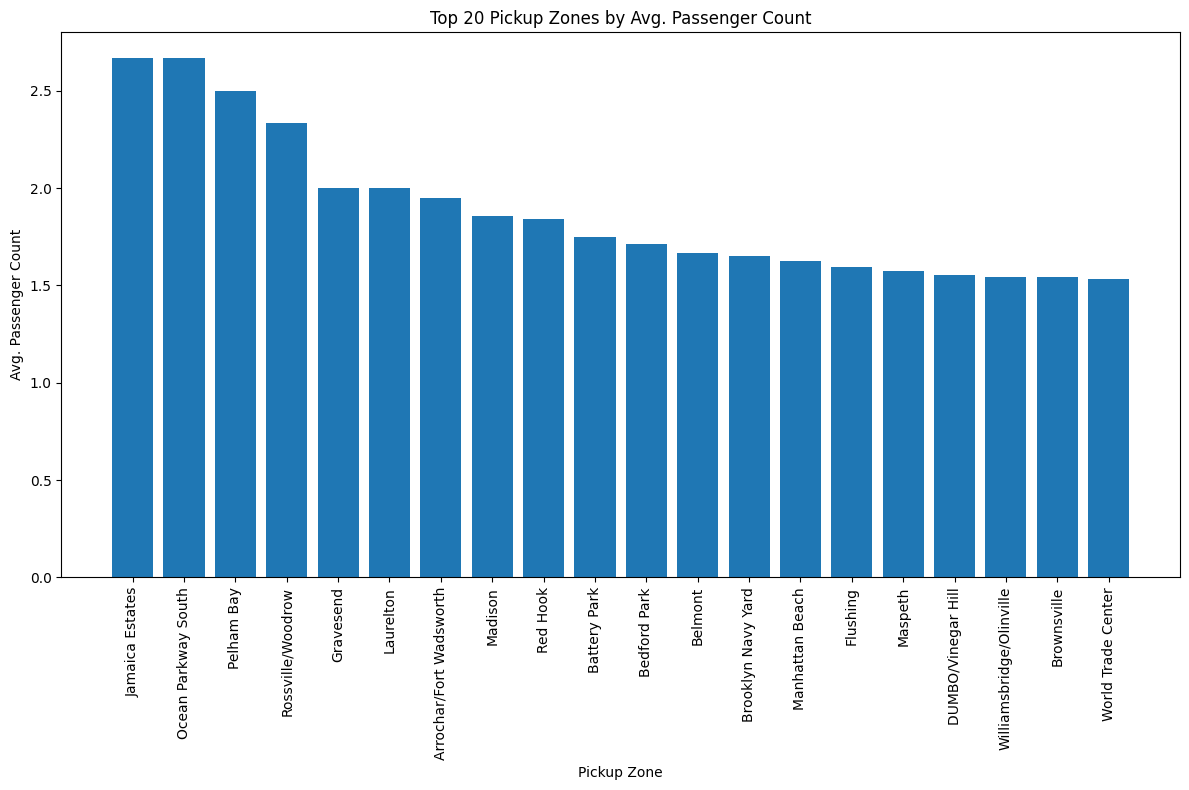

In [118]:
# How does passenger count vary across zones

avg_passenger_by_zone = df2.groupby('pickup_zone')['passenger_count'].mean().reset_index()
top_20_passenger_variation_by_zone = avg_passenger_by_zone.sort_values(by='passenger_count', ascending=False).head(20)
plt.figure(figsize=(12, 8))  # Set the figure size
plt.bar(top_20_passenger_variation_by_zone['pickup_zone'], top_20_passenger_variation_by_zone['passenger_count'])
plt.xlabel('Pickup Zone')
plt.ylabel('Avg. Passenger Count')
plt.title('Top 20 Pickup Zones by Avg. Passenger Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

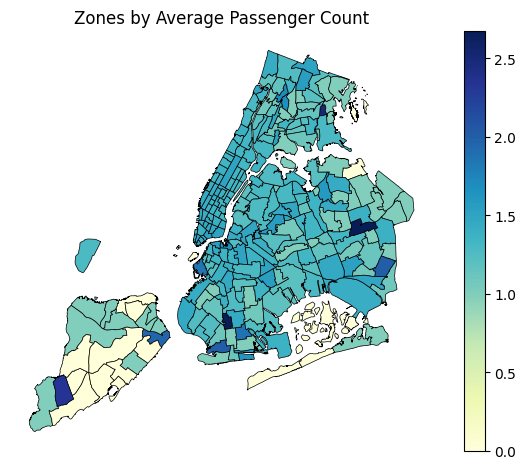

In [119]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_passenger_by_zone =  df2.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone['avg_passenger_count'] = avg_passenger_by_zone['passenger_count'].round(2)
avg_passenger_by_zone.drop(columns='passenger_count', inplace=True)
# Merge into zones GeoDataFrame
zones_trips = zones_trips.merge(avg_passenger_by_zone, on='PULocationID', how='left')
# Fill NaN (zones with no trips) with 0
zones_trips['avg_passenger_count'] = zones_trips['avg_passenger_count'].fillna(0)

plt.figure(figsize=(15, 10))
zones_trips.plot(
    column='avg_passenger_count',
    cmap='YlGnBu',
    legend=True,
    edgecolor='black',
    linewidth=0.5
)

plt.title("Zones by Average Passenger Count")
plt.axis('off')
plt.tight_layout()
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

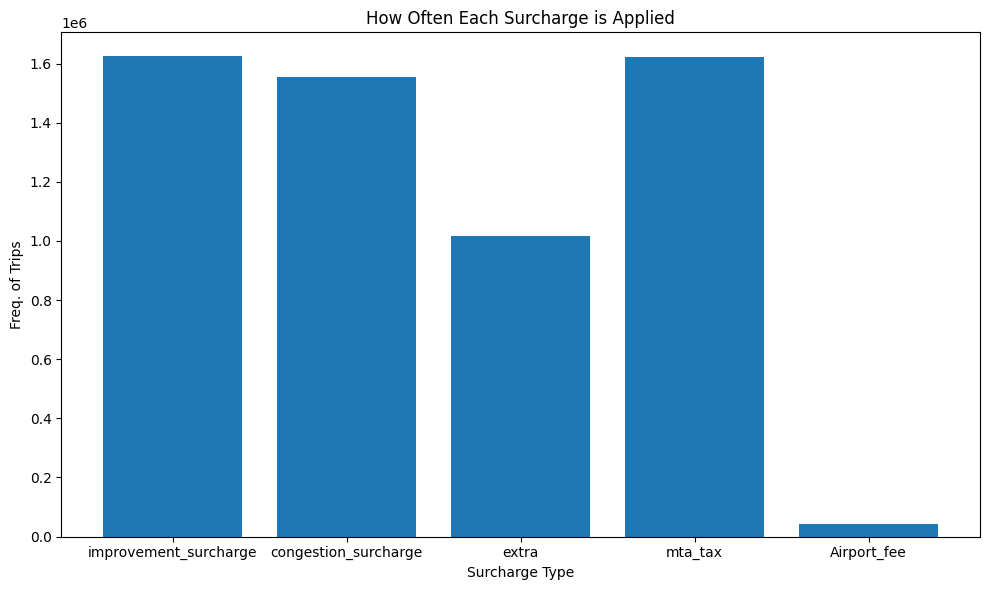

In [120]:
# How often is each surcharge applied?
surcharge_columns = ['improvement_surcharge', 'congestion_surcharge', 'extra', 'mta_tax', 'Airport_fee']

surcharge_counts = {col: (df2[col] > 0).sum() for col in surcharge_columns}

plt.figure(figsize=(10, 6))
plt.bar(surcharge_counts.keys(), surcharge_counts.values())

plt.xlabel('Surcharge Type')
plt.ylabel('Freq. of Trips')
plt.title('How Often Each Surcharge is Applied')
plt.tight_layout()
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

## Conclusion 4.1.1 - Optimize routing and dispatching based on demand patterns

- **Peak Hour Optimization**: Increase fleet allocation during high-demand periods (**5 PM - 7 PM and mid-week days**) to reduce wait times and maximize revenue.
- **Route Optimization**: Utilize GPS-based navigation and traffic analysis to determine the fastest and most fuel-efficient routes, reducing trip durations and costs.
- **Passenger Pooling Strategies**: Encourage shared rides in high-demand zones to maximize vehicle occupancy and minimize congestion.
- **Incentive-Based Rebalancing**: Offer driver incentives to operate in undersupplied areas to balance demand and supply efficiently.
- **Surge Pricing Adjustments**: Implement flexible pricing models during peak hours and in low-availability zones to enhance service levels and profitability.

These optimizations can significantly improve overall efficiency, customer satisfaction, and profitability for NYC taxi operations.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

## Conclusion 4.1.2- Positioning cabs across different zones

### Time-Based Shifts in Deployment

**Morning (7–10 AM)**: Focus on **business areas** like Midtown and the Financial District for commuters.  
**Afternoon (12–4 PM)**: Shift taxis to **tourist spots** like Times Square and Central Park.  
**Evening (5–8 PM)**: Focus on **nightlife areas** like East Village and Times Square after work hours.  
**Night (9 PM–2 AM)**: Increase taxis in **nightlife areas** and **tourist zones** on weekends.

### Weekday vs Weekend Strategy

**Weekdays**:  
- Focus on **business areas** during **morning** and **evening rush hours.**  
- Reduce taxis in **residential areas** during work hours, and increase them in **commercial zones**.

**Weekends**:  
- Focus on **tourist and nightlife areas** in the **afternoon and evening.**  
- Increase taxis in **nightlife spots** on **Friday and Saturday nights**.

### Seasonal Adjustments

- **Winter (Nov–Jan)**: More taxis needed at **airports** and **commercial areas** during the **holiday season.**  
- **Summer (Jun–Aug)**: More taxis needed in **tourist areas** and **airports** for vacation travel.

### Airport Pickup Efficiency

- **JFK and LaGuardia**: More pickups but fewer drop-offs.  
- **Summer** and **holiday season** have more airport traffic.

**Recommendation**:  
- Encourage **pre-booked drop-offs** to reduce empty trips during the holidays.  
- Use an **airport queue system** to match taxis with flight arrivals.

### Taxi Availability in Residential & Tourist Areas

- **Tourist spots** have more demand in the **afternoon and evening**, especially in **summer**.  
- **Residential areas** see steady morning demand but less in **January–February** due to cold weather.

**Recommendation**:  
- Increase taxis in **tourist areas** from **midday to evening**, especially in **summer**.  
- Ensure taxis are available in **residential areas** during **early mornings and late nights** year-round.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

## Conclusion 4.1.3- Price strategy to maximize revenue

### Time-Based Shifts in Deployment

**Peak Hours (7 AM – 10 AM, 5 PM – 8 PM)**: Focus on **high-demand commuter areas** and **business districts**.  
**Late-Night Weekends (11 PM – 2 AM)**: Shift taxis to **nightlife areas** to capture demand from evening crowds.  

### Seasonal Adjustments

- **Summer (June–August)**: Increase availability in **tourist zones** like Times Square and Central Park, where demand is highest.  
- **Holiday Months (November–December)**: Adjust fleet sizes and pricing to accommodate increased traffic and tourism.  
- **Winter (January–February)**: Expect lower demand, so reduce taxi presence in less frequented areas and offer **driver incentives** to maintain service levels.

### Fare Strategy

- Apply **fare increases during peak hours** (morning rush, evening rush, and late-night weekends) to maximize revenue without losing competitiveness.  
- Offer **discounted fares during off-peak times** (midday on weekdays, early mornings on weekends) to encourage more trips and keep taxis running smoothly during low-demand periods.

### Reduce Empty Return Trips

- **JFK and LaGuardia Airports**: Significant loss of revenue due to **empty return trips**.

### Maximize Revenue on Short Trips (0–2 Miles)

- **Short trips (0–2 miles) generate the highest revenue per trip** due to higher base fares and quick turnover.  

**Recommendation**:  
- Position taxis in **high-density areas** like **Midtown, Financial District, and nightlife zones** to maximize short-trip frequency.  
- Encourage **ride-sharing or pooled rides** to optimize vehicle usage during high-demand hours.